# 1. patient analysis

In [1]:
import pandas as pd

In [2]:
import openpyxl

# Define variable to load the dataframe
#patient = openpyxl.load_workbook('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/patient_20220426.xlsx')
patient = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/patient_20220426.xlsx')


patient



,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction
0,14677,NaN,NaN,NaN,Male,1946-03-21 00:00:00,180.0,cm,80.0,kg,Married,No,Indian,1.200,College/university completed
1,14645,NaN,NaN,NaN,Female,1966-06-29 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN
2,14614,NaN,NaN,NaN,Female,1974-12-14 00:00:00,161.0,cm,78.5,kg,NaN,No,NaN,0.000,NaN
3,14593,NaN,NaN,NaN,Male,1985-03-30 00:00:00,168.0,cm,84.0,kg,Single,No,Chinese,1.200,College/university completed
4,14592,NaN,NaN,NaN,Female,1977-12-10 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,14386,NaN,NaN,NaN,Male,1956-09-25 00:00:00,180.0,cm,80.0,kg,Married,No,Indian,1.550,Secondary/high school completed
103,14385,NaN,NaN,NaN,Male,1962-12-22 00:00:00,164.0,cm,78.0,kg,NaN,No,NaN,0.000,NaN
104,14341,NaN,NaN,NaN,Male,1000-04-25,172.0,cm,65.0,kg,NaN,No,NaN,1.200,NaN
105,14319,NaN,NaN,NaN,Male,1990-10-04 00:00:00,170.0,cm,70.0,kg,NaN,No,Chinese,1.375,NaN


# EDA

In [3]:
import seaborn as sbn
import matplotlib.pyplot as plt
def boxplots(NUMERICAL, data):
    for f in NUMERICAL:
        plt.figure(figsize=(15, 3))
        sbn.boxplot(data=data[f], orient='h').set_title(f)
        plt.show()

        
def boxplots_target(NUMERICAL, data, target):
    for f in NUMERICAL:
        plt.figure(figsize=(15, 3))
        snb.boxplot(x=f, y=target, hue=target, data=data, orient='h')
        plt.show()

        
def histplots(data, NUMERICAL):
    cols = 3
    rows = 9

    num_cols = data.select_dtypes(exclude='object').columns
    fig = plt.figure( figsize=(cols*5, rows*5))
    for i, col in enumerate(NUMERICAL):
    
        ax=fig.add_subplot(rows,cols,i+1)
    
        sbn.histplot(x = data[col], ax = ax)
    
    fig.tight_layout()  
    plt.show()

    
def violinplots(data, NUMERICAL):
    for f in NUMERICAL:
        plt.figure(figsize=(15, 3))
        sbn.violinplot(x=data[f], orient='h').set_title(f)
        plt.show()


def eda(dataframe):
    print(f"""
    
    -- dtypes --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {dataframe.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
       
    return dataframe.head()
eda(patient)


    
    -- dtypes --
    
    patientID        int64
firstName      float64
lastName       float64
email          float64
gender          object
birthday        object
height         float64
height_unit     object
weight         float64
weight_unit     object
marital         object
smoking         object
race            object
life_style     float64
Eduction        object
dtype: object
    
    -- NaN Values --
    
    patientID        0
firstName      107
lastName       107
email          107
gender           1
birthday         0
height           1
height_unit      0
weight           1
weight_unit      0
marital         59
smoking          0
race            55
life_style       0
Eduction        56
dtype: int64
    
    -- Shape --
    
    (107, 15)
    
    -- Unique --
    
    patientID      107
firstName        0
lastName         0
email            0
gender           3
birthday       106
height          32
height_unit      1
weight          56
weight_unit      1
marital        

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction
0,14677,NaN,NaN,NaN,Male,1946-03-21 00:00:00,180.0,cm,80.0,kg,Married,No,Indian,1.2,College/university completed
1,14645,NaN,NaN,NaN,Female,1966-06-29 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.0,NaN
2,14614,NaN,NaN,NaN,Female,1974-12-14 00:00:00,161.0,cm,78.5,kg,NaN,No,NaN,0.0,NaN
3,14593,NaN,NaN,NaN,Male,1985-03-30 00:00:00,168.0,cm,84.0,kg,Single,No,Chinese,1.2,College/university completed
4,14592,NaN,NaN,NaN,Female,1977-12-10 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.0,NaN


In [4]:
patient.describe().T

,count,mean,std,min,25%,50%,75%,max
patientID,107.0,14477.971963,76.822198,14042.0,14434.00,14485.0,14523.500,14677.00
firstName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,106.0,163.154717,9.064227,144.0,156.00,162.0,168.000,182.00
weight,106.0,73.449057,16.951254,43.0,62.25,70.5,80.000,122.00
life_style,107.0,0.801402,0.683247,0.0,0.00,1.2,1.375,1.55


In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
"""
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list
        cat_but_car: list
                Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = the total number of variables
        num_but_cat is inside cat_cols.
        The sum of 3 lists with return is equal to the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

'\n    ------\n        cat_cols: list\n                Categorical variable list\n        num_cols: list\n                Numerical variable list\n        cat_but_car: list\n                Categorical view cardinal variable list\n\n    Examples\n    ------\n        import seaborn as sns\n        df = sns.load_dataset("iris")\n        print(grab_col_names(df))\n\n\n    Notes\n    ------\n        cat_cols + num_cols + cat_but_car = the total number of variables\n        num_but_cat is inside cat_cols.\n        The sum of 3 lists with return is equal to the total number of variables: cat_cols + num_cols + cat_but_car = number of variables\n\n    '

In [7]:
cat_cols, num_cols, cat_but_car, = grab_col_names(patient)

Observations: 107
Variables: 15
cat_cols: 11
num_cols: 3
cat_but_car: 1
num_but_cat: 4


In [8]:
cat_cols, num_cols, cat_but_car

(['gender',
  'height_unit',
  'weight_unit',
  'marital',
  'smoking',
  'race',
  'Eduction',
  'firstName',
  'lastName',
  'email',
  'life_style'],
 ['patientID', 'height', 'weight'],
 ['birthday'])

In [9]:
num_cols.remove('patientID')
print(num_cols)

['height', 'weight']


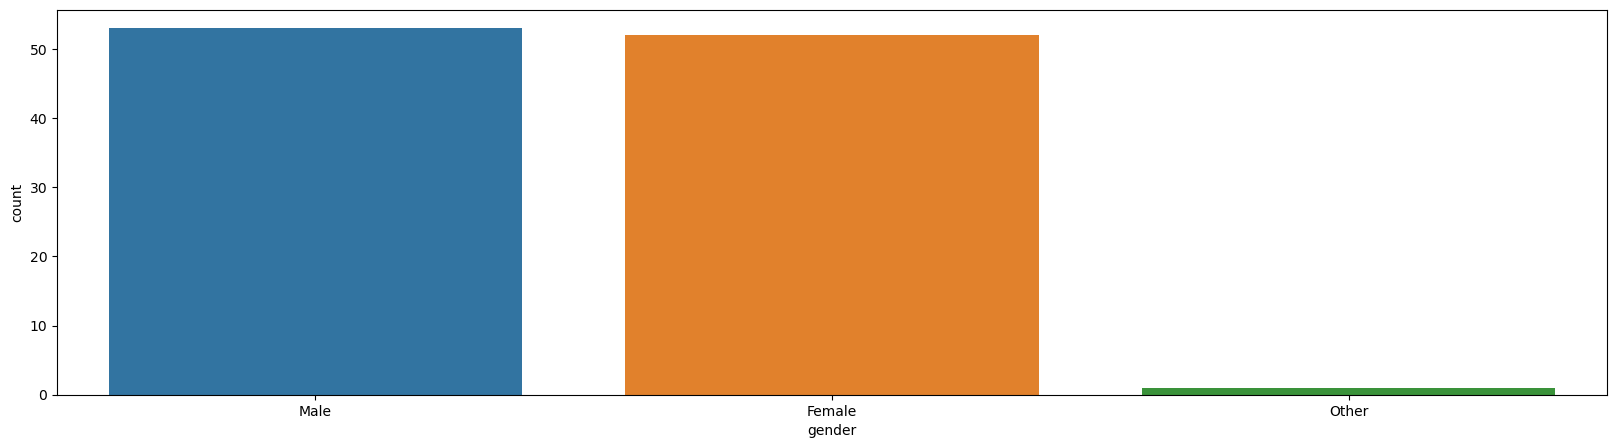

In [10]:

plt.figure(figsize=(20, 5))
sbn.countplot(x='gender', data=patient)
plt.show()

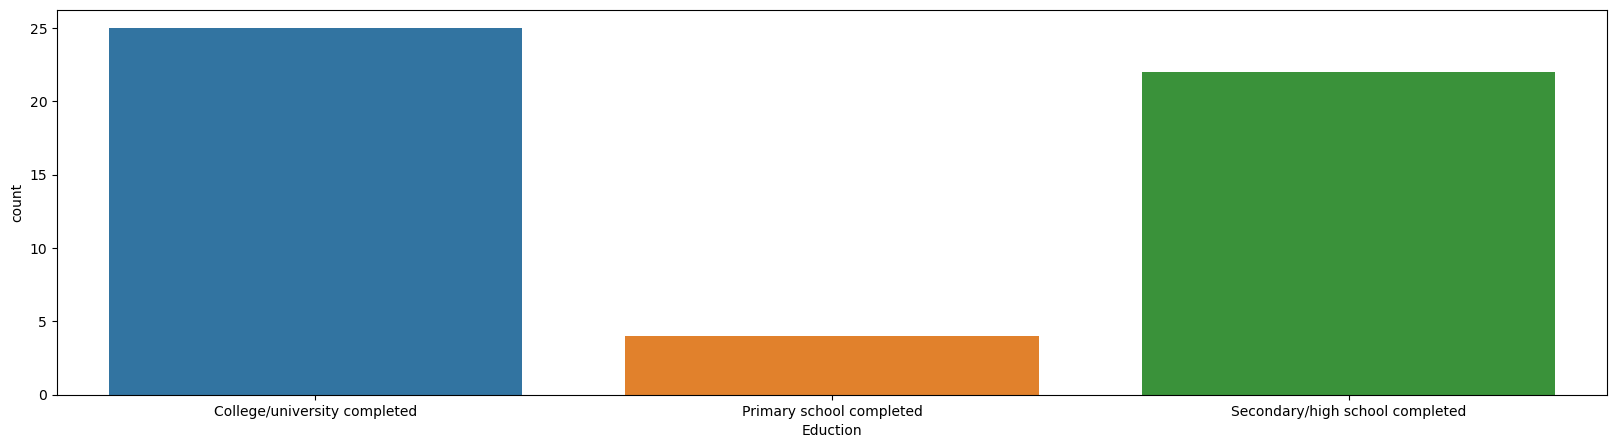

In [11]:
plt.figure(figsize=(20, 5))
sbn.countplot(x='Eduction', data=patient)
plt.show()

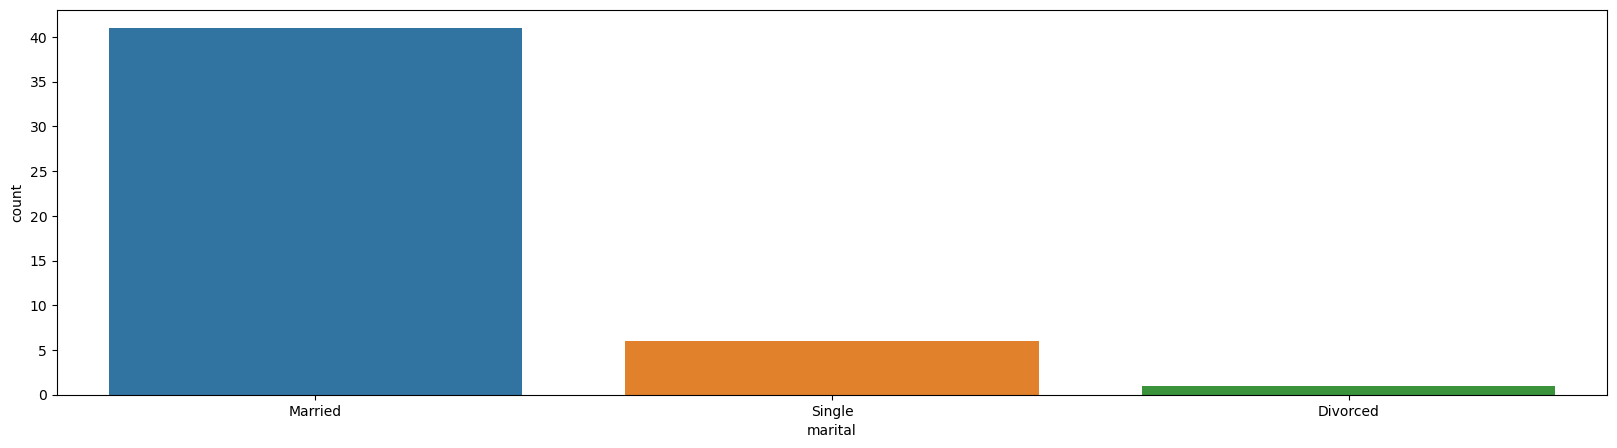

In [12]:
plt.figure(figsize=(20, 5))
sbn.countplot(x='marital', data=patient)
plt.show()

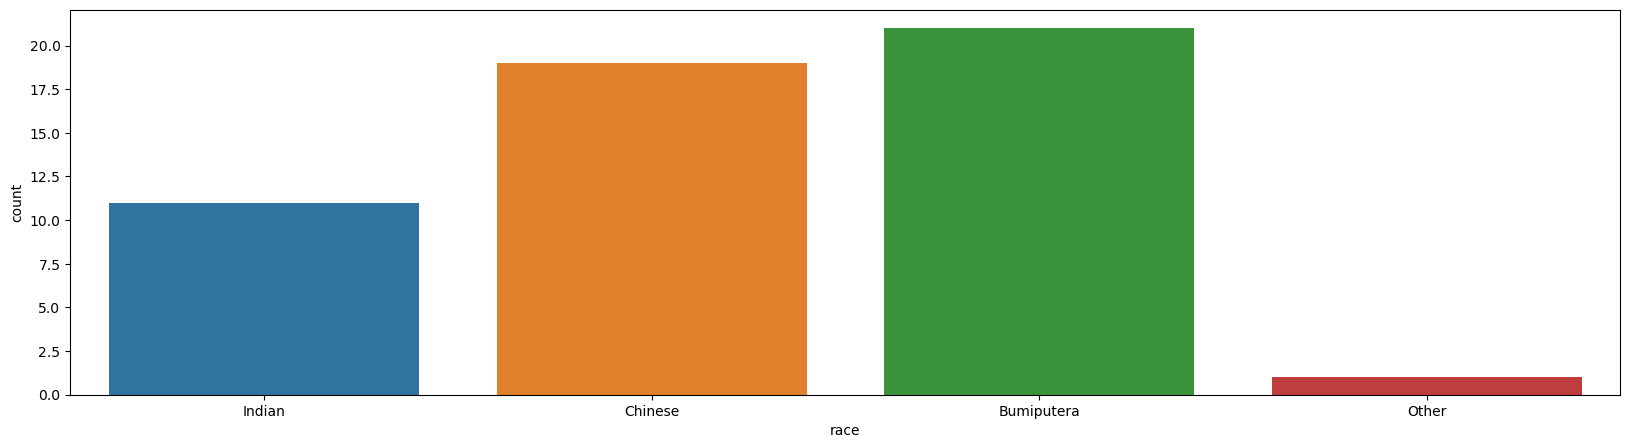

In [13]:
plt.figure(figsize=(20, 5))
sbn.countplot(x='race', data=patient)
plt.show()

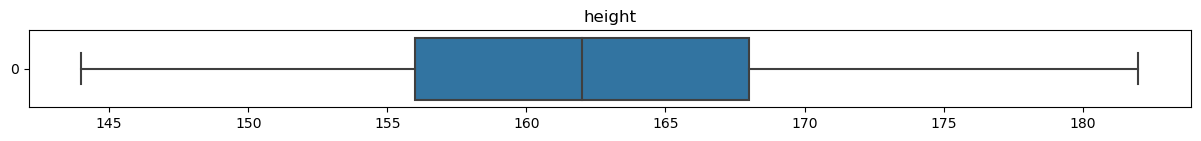

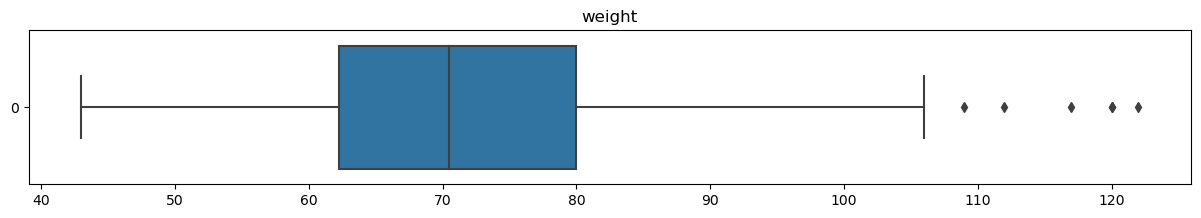

In [14]:
plt.figure(figsize=(15, 1))
sbn.boxplot(data=patient['height'], orient='h').set_title('height')
plt.show()

plt.figure(figsize=(15, 2))
sbn.boxplot(data=patient['weight'], orient='h').set_title('weight')
plt.show()


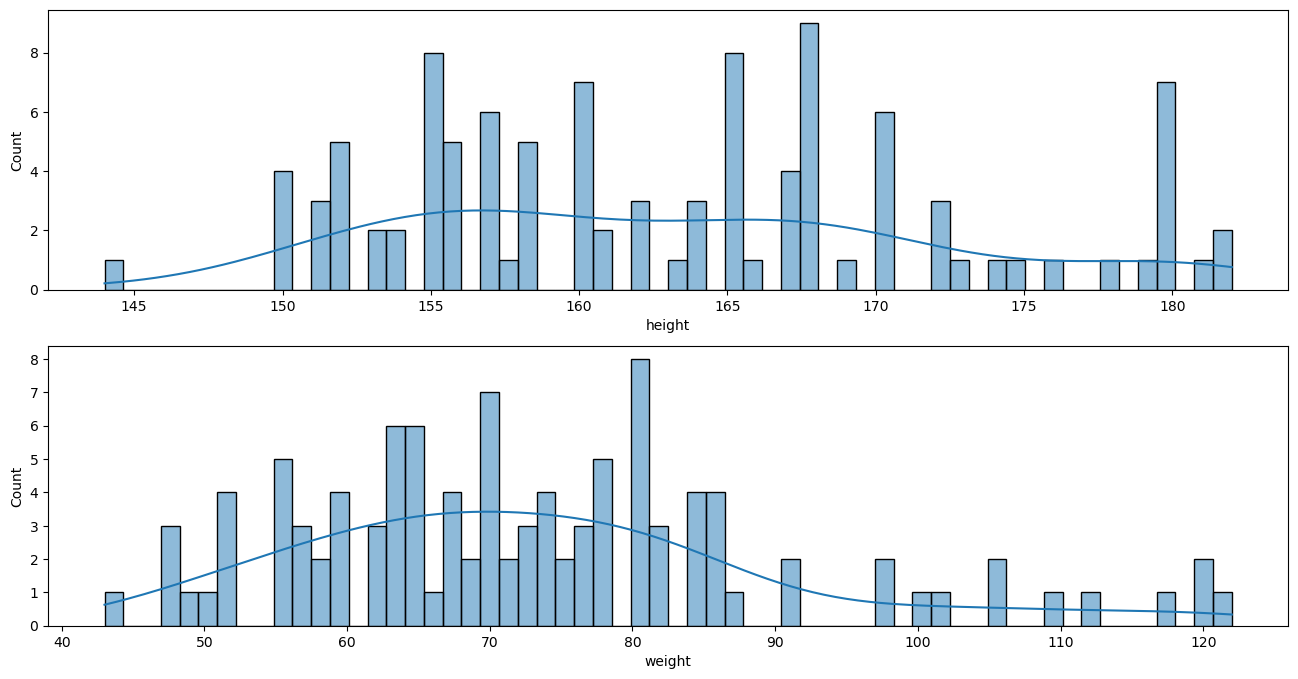

In [15]:

plt.figure(figsize = (16,8))
for i,x in enumerate(num_cols):
    plt.subplot(2,1,i+1)
    sbn.histplot(patient[x],bins=60, kde=True)


# Preprocessing

# Remove outlier

In [16]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [18]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [19]:
for x in num_cols:
  print(x,check_outlier(patient,x))

height False
weight True


In [20]:
for x in num_cols:
  replace_with_thresholds(patient,x)



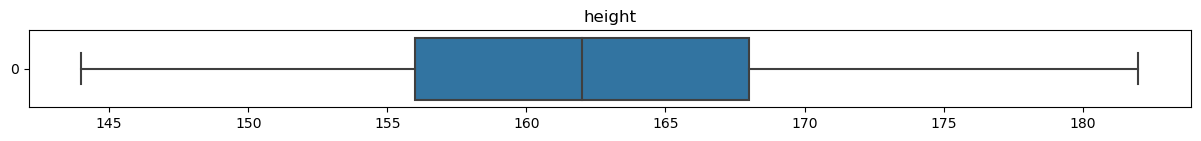

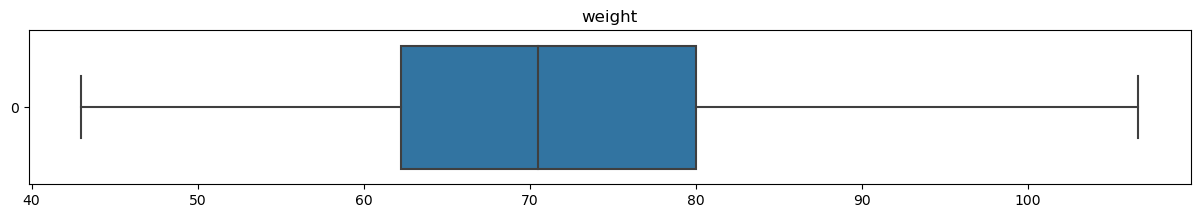

In [21]:
plt.figure(figsize=(15, 1))
sbn.boxplot(data=patient['height'], orient='h').set_title('height')
plt.show()

plt.figure(figsize=(15, 2))
sbn.boxplot(data=patient['weight'], orient='h').set_title('weight')
plt.show()

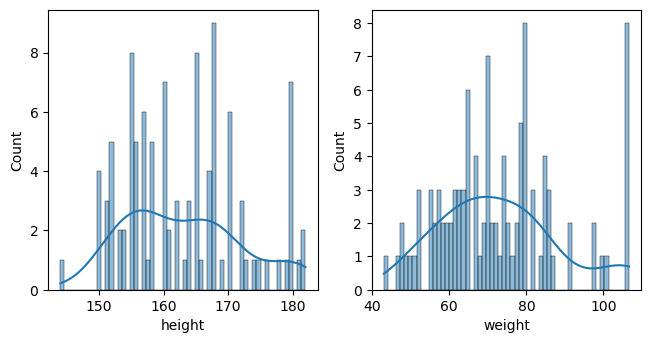

In [22]:
plt.figure(figsize = (16,8))
for i,x in enumerate(num_cols):
  plt.subplot(2,4,i+1)
  sbn.histplot(patient[x],bins=60, kde=True)

convert categorical columns to dummy variable columns

consider there are too much unknown values in marital , race and education 
they will not be included in new dataframe

In [23]:
new_patient = patient.copy()
new_patient=new_patient.dropna(subset=['gender'])
#here , gender may a important factor , so 'Other' is dropped due to uncertainty
new_patient = new_patient[new_patient.gender != 'Other']
new_patient.isnull().sum()

patientID        0
firstName      105
lastName       105
email          105
gender           0
birthday         0
height           0
height_unit      0
weight           0
weight_unit      0
marital         57
smoking          0
race            54
life_style       0
Eduction        55
dtype: int64

# Convert categorical value to numberical value

In [24]:
new_patient = patient.copy()
new_patient=new_patient.dropna(subset=['gender'])
new_patient = new_patient[new_patient.gender != 'Other']
new_patient['gender'] = new_patient['gender'].replace({ "Male": "1", "Female": "0"})
new_patient['smoking'] = new_patient['smoking'].replace({ "Yes": "1", "No": "0"})

column=['firstName','lastName','email','height_unit','weight_unit','marital' , 'race' , 'Eduction']
new_patient.drop(column, axis='columns', inplace=True)
#calculate age based on birthday
from datetime import date
from datetime import datetime
today = date.today()
from dateutil.parser import parse
new_patient['birthday'] = new_patient["birthday"].apply(lambda x: \
    str(x))
new_patient['birthday'] = new_patient["birthday"].apply(lambda x: \
    x.split(' ')[0])
new_patient = new_patient[(new_patient.birthday != '0000-00-00')]
new_patient['birthday'] = new_patient["birthday"].apply(lambda x: \
    datetime.strptime(x,'%Y-%m-%d').date())
new_patient['age'] = new_patient["birthday"].apply(lambda x: \
    today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
# remove the abnormal age
new_patient = new_patient[new_patient.age <= 120]
new_patient.drop('birthday', axis='columns', inplace=True)
new_patient

,patientID,gender,height,weight,smoking,life_style,age
0,14677,1,180.0,80.0,0,1.200,77
1,14645,0,155.0,57.0,0,0.000,56
2,14614,0,161.0,78.5,0,0.000,48
3,14593,1,168.0,84.0,0,1.200,38
4,14592,0,155.0,57.0,0,0.000,45
...,...,...,...,...,...,...,...
101,14387,0,155.0,63.5,0,0.000,64
102,14386,1,180.0,80.0,0,1.550,66
103,14385,1,164.0,78.0,0,0.000,60
105,14319,1,170.0,70.0,0,1.375,32


In [25]:
print(f'data still consists {len(new_patient)/len(patient)} % of original data')

data still consists 0.9719626168224299 % of original data


# 2. patient stat analysis

In [26]:
patient_stat = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/bp_20220426.xlsx', index_col=0)
    

In [27]:
patient_stat = patient_stat.reset_index()
patient_stat = patient_stat.sort_values(by=['patientID'])
patient_stat

,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit
4069,14042,124,83,91,2020-08-16 08:14:00,NaN,manual,mmHg
3783,14042,112,82,86,2021-07-18 15:07:41,before lunch,manual,mmHg
3784,14042,115,84,83,2021-07-18 15:07:03,before lunch,manual,mmHg
3785,14042,115,84,83,2021-07-18 15:07:03,before lunch,manual,mmHg
3786,14042,119,86,92,2021-07-18 07:19:40,before breakfast,manual,mmHg
...,...,...,...,...,...,...,...,...
1217,14614,137,90,69,2022-01-10 07:35:39,NaN,manual,mmHg
1225,14614,140,83,66,2022-01-09 21:06:49,NaN,B3 BT,mmHg
1226,14614,133,83,68,2022-01-09 21:05:30,NaN,B3 BT,mmHg
1274,14614,161,94,76,2022-01-07 16:25:44,NaN,B3 BT,mmHg


# EDA

In [28]:
eda(patient_stat)


    
    -- dtypes --
    
    patientID              int64
systolic               int64
diastolic              int64
pulse                  int64
recordTime    datetime64[ns]
notes                 object
deviceID              object
unit                  object
dtype: object
    
    -- NaN Values --
    
    patientID        0
systolic         0
diastolic        0
pulse            0
recordTime       0
notes         2962
deviceID         0
unit             0
dtype: int64
    
    -- Shape --
    
    (4070, 8)
    
    -- Unique --
    
    patientID       90
systolic       119
diastolic       88
pulse           79
recordTime    3560
notes          348
deviceID         3
unit             1
dtype: int64
    
    -- Head --
    


,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit
4069,14042,124,83,91,2020-08-16 08:14:00,NaN,manual,mmHg
3783,14042,112,82,86,2021-07-18 15:07:41,before lunch,manual,mmHg
3784,14042,115,84,83,2021-07-18 15:07:03,before lunch,manual,mmHg
3785,14042,115,84,83,2021-07-18 15:07:03,before lunch,manual,mmHg
3786,14042,119,86,92,2021-07-18 07:19:40,before breakfast,manual,mmHg


In [29]:
patient_stat.describe()

,patientID,systolic,diastolic,pulse
count,4070.000000,4070.000000,4070.000000,4070.000000
mean,14440.375676,132.770762,77.735135,74.554791
std,149.128058,199.639537,13.189737,22.963996
min,14042.000000,59.000000,0.000000,0.000000
25%,14432.000000,119.000000,69.000000,65.000000
50%,14487.000000,129.000000,79.000000,73.000000
75%,14536.000000,138.000000,86.000000,83.000000
max,14614.000000,12822.000000,131.000000,779.000000


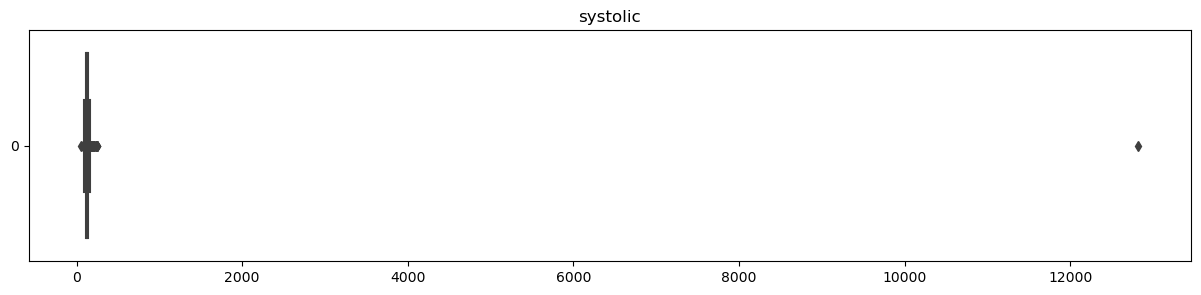

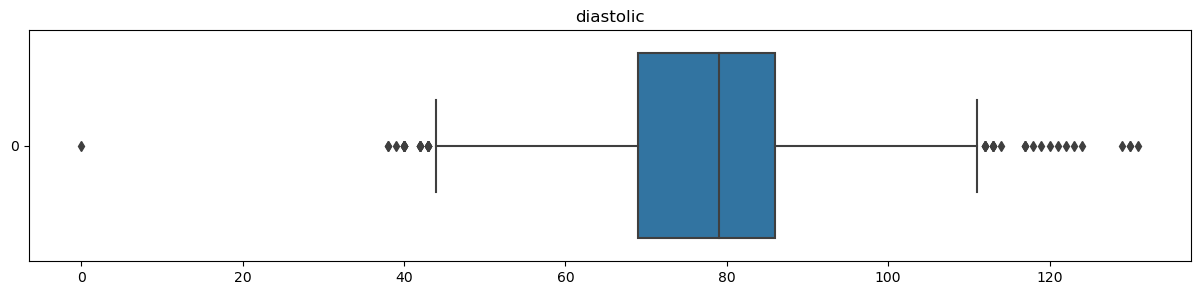

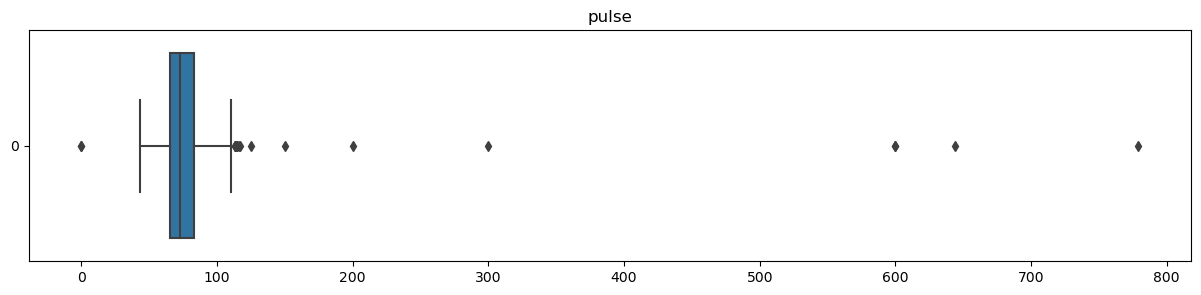

In [30]:
NUMERICAL=['systolic','diastolic','pulse']
boxplots(NUMERICAL, patient_stat)

# preprocessing

# remove outliner

In [31]:
columns = ['systolic','diastolic','pulse']
for col in columns :
    print(col,check_outlier(patient_stat,col))

systolic True
diastolic True
pulse True


In [32]:
for col in columns :
  replace_with_thresholds(patient_stat,col)

In [33]:
columns = ['systolic','diastolic','pulse']
for col in columns :
    print(col,check_outlier(patient_stat,col))

systolic False
diastolic False
pulse False


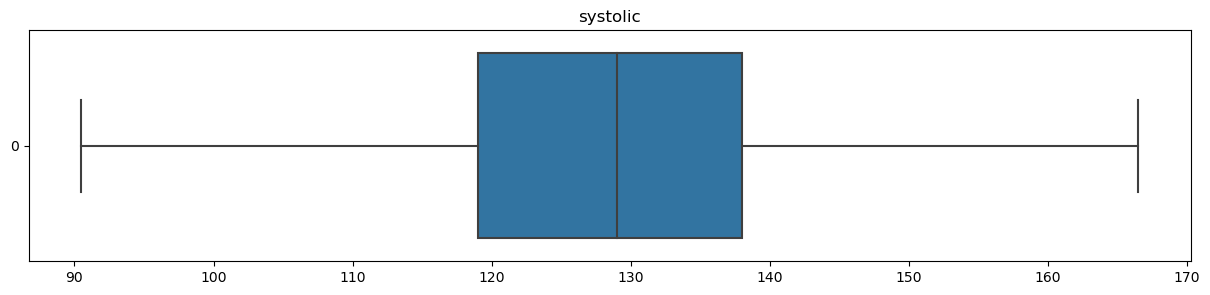

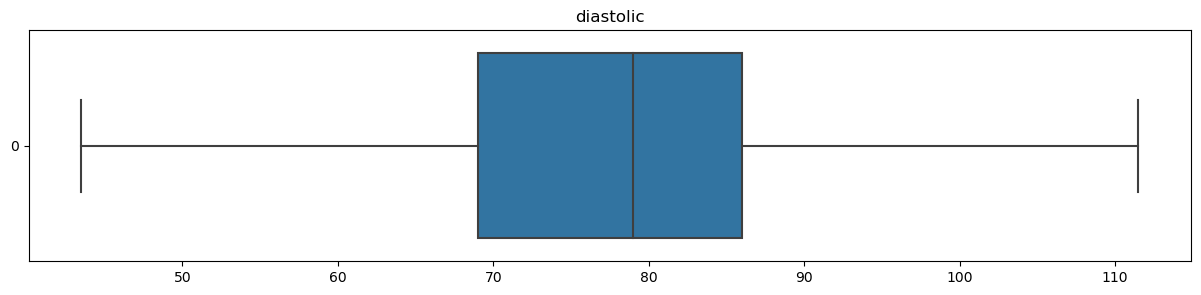

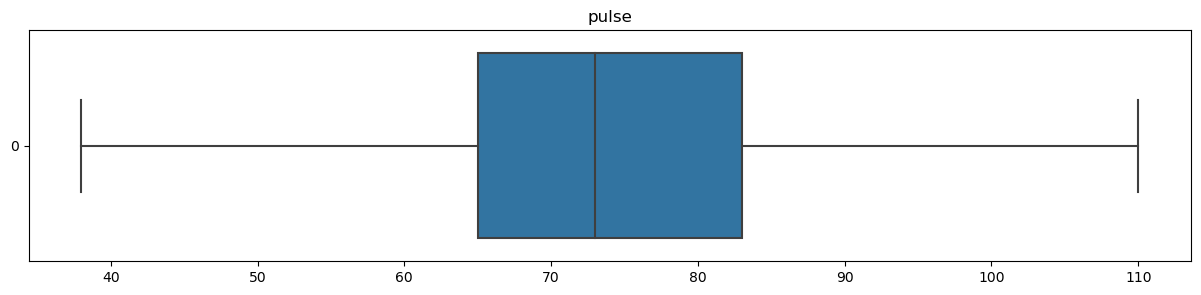

In [34]:
NUMERICAL=['systolic','diastolic','pulse']
boxplots(NUMERICAL, patient_stat)

In [35]:
patient_stat["notes"].unique()

array([nan, 'before lunch', 'before breakfast', 'before dinner',
       'pre breakfast', 'after dinner', 'before breakfast\n',
       'pre dinner', 'after lunch', 'pre lunch', 'testing2', 'testing3',
       'testing', 'Test Update 4', 'TSJ edited', 'Test Add', 'after meal',
       'after breakfast', 'Morning', 'before meal', 'Evening', 'morning',
       'test', 'lepas makan', 'before bed', 'fasting', 'after food',
       'second round', 'lepas ', 'sebelom minum pagi', 'lepas minum pagi',
       'lepas bangun tido', 'selepas mkn pagi',
       'belom makn\npagi & bari bgn tido', 'Zinnat at 9:30pm',
       'lepas bgn tid0', 'bangun tido', 'ujian kali kedua',
       'selepas bgn tido', 'banguntido', 'baru bangun tido',
       'pump kali kedua', 'demam', 'demam selepas vaksin', 'bangun tifo',
       'selepas bangun tido', 'second  pump', 'bangun tifor', 'wake up',
       'bed time', 'While watching TV.', 'Before going sleep.',
       'before meal\n', '8pm', 'before medicine', 'after dinner 

In [36]:
before_eating = ['before breakfast','before bunch','before dinner','before food','before meal','sebelom minum pagi',\
                 'Before bfast','no breakfast','b4 dinner','b 4 bfast','bf medicine and breakfast','b4 bfast'\
                ,'before. meal','prebfast','predinner','prebreakfast']

after_eating = ['after dinner','after lunch','after meal','after dinner','after food','lepas minum pagi'\
                'after  breakfast','after exercises and breakfast','after breakfast, after exercise'\
               ,'after walking, exercise and bfast','After breakfast','postdinner','post dinner','post bfast'\
               ]
before_medicine = ['no taking medicine','before medicine','before medication','no medicine','b 4 medicine'\
                  'bf medicine and breakfast','before  medicine','before. medicine']
after_medicine = ['medicine taken','took medicine','after medicine']
after_exercise = ['after exercise','after walking','after  walking','after  exercise','after erercrs walking'\
                 ,'after exercises and breakfast','after breakfast, after exercise','after meal & exercise'\
                 ,'after morning  walk','after walking exercise','after  morning  walk']

In [37]:
def histplot_less(label1,keyword1,column,data):
    data1 = data[data['notes'].str.contains('|'.join(keyword1),na=False)==True]
    replace_with_thresholds(data1,'systolic')
    data2 = data[data['notes'].str.contains('|'.join(keyword1),na=False)==False]
    replace_with_thresholds(data2,'systolic')
    
    
    plt.figure(figsize = (16,8))
    sbn.histplot(data=data1[column],bins=60, kde=True,label="after "+label1+f", number:{len(data1)}")
    plt.legend()
    plt.plot()
    plt.figure(figsize = (16,8))
    sbn.histplot(data=data2[column],bins=60, kde=True,label="before "+label1+f", number:{len(data2)}")
    plt.legend()
    plt.plot()
#histplot_less('exercise',after_exercise,'systolic',patient_stat)
#histplot_less('eating',after_eating,'systolic',patient_stat)
#histplot_less('medicine',after_medicine,'systolic',patient_stat)

In [38]:
def histplot(label1,label2,keyword1,keyword2,column,data):
 #   data1 = data[data['notes'].str.contains('|'.join(keyword1),na=False)==True][column]
 #   data2 = data[data['notes'].str.contains('|'.join(keyword2),na=False)==True][column]
    data1 = data[data['notes'].str.contains('|'.join(keyword1),na=False)==True]
    replace_with_thresholds(data1,column)
    data2 = data[data['notes'].str.contains('|'.join(keyword2),na=False)==True]
    replace_with_thresholds(data2,column)
    plt.figure(figsize = (16,8))
    sbn.histplot(data=data1[column],bins=60, kde=True,label=label1+f", number:{len(data1)}")
    sbn.histplot(data=data2[column],bins=60, kde=True,label=label2+f", number:{len(data2)}")
    plt.legend()
    

Datas from each keywords are not complete with enough patient 

Normal. systolic: less than 120 mm Hg. 

diastolic: less than 80 mm Hg. 

normal pulse: 60 to 100 beats per minute.

At Risk (prehypertension) 

systolic: 120–139 mm Hg.

diastolic pressure from 80–89 mm Hg


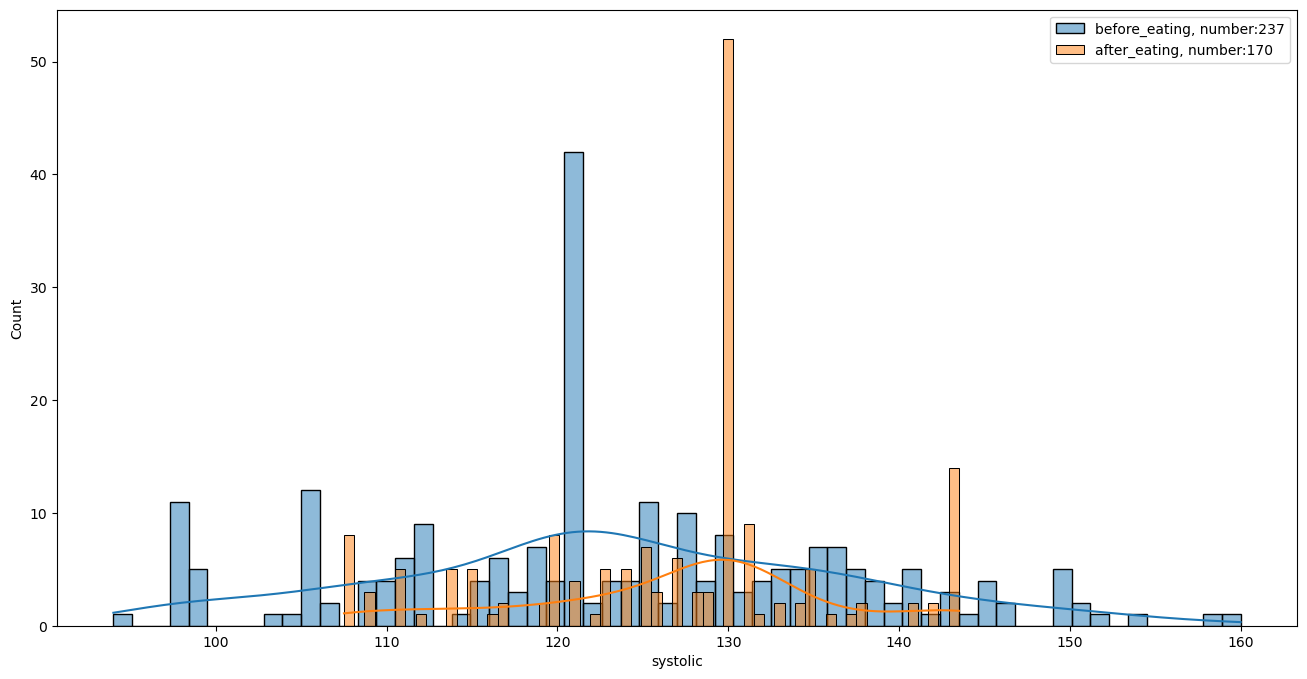

In [39]:
histplot('before_eating','after_eating',before_eating,after_eating,'systolic',patient_stat)

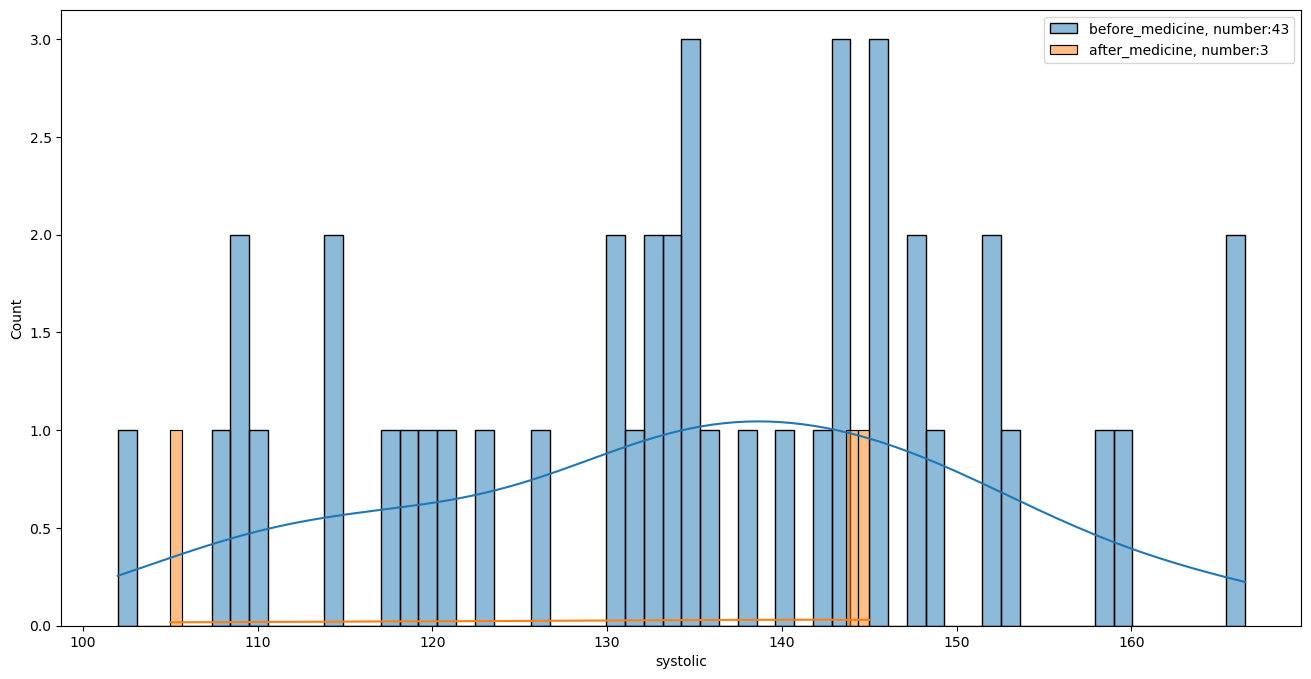

In [40]:
histplot('before_medicine','after_medicine',before_medicine,after_medicine,'systolic',patient_stat)

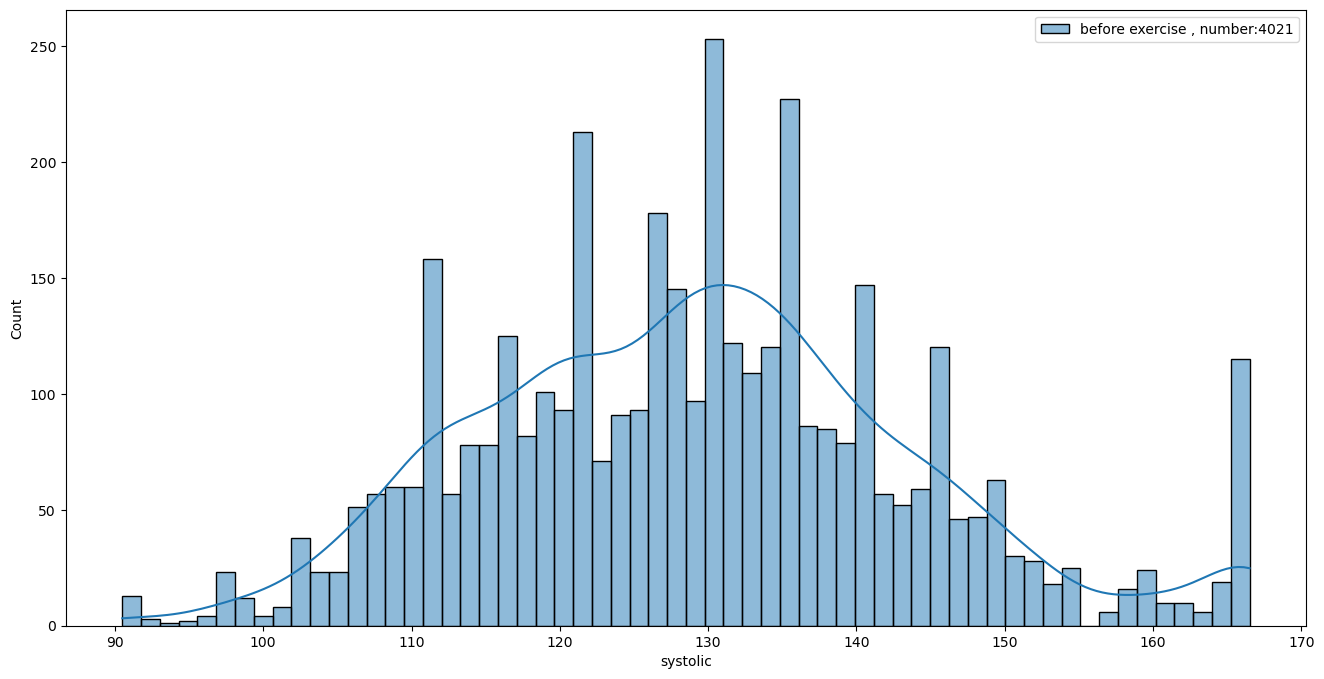

In [41]:
data2 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==False]
replace_with_thresholds(data2,'systolic')
plt.figure(figsize = (16,8))
sbn.histplot(data=data2['systolic'],bins=60, kde=True,label=f"before exercise , number:{len(data2)}")

plt.legend()

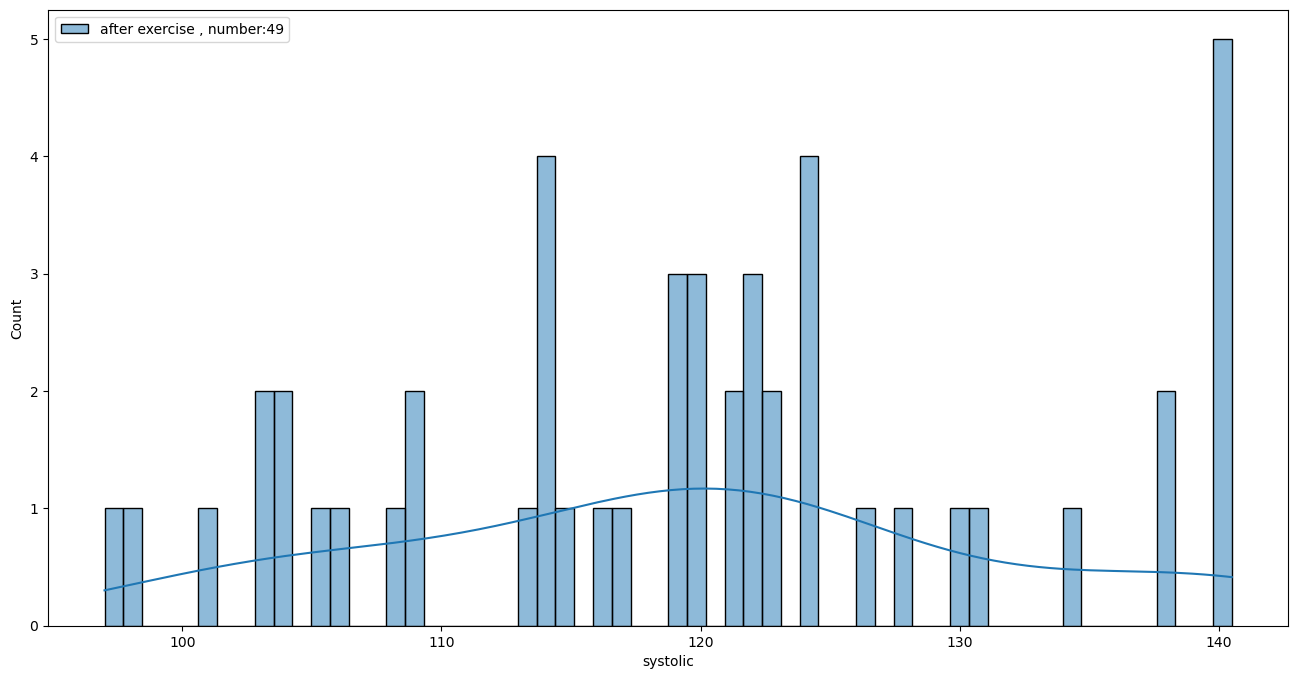

In [42]:
data1 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==True]
replace_with_thresholds(data1,'systolic')
plt.figure(figsize = (16,8))
sbn.histplot(data=data1['systolic'],bins=60, kde=True,label=f"after exercise , number:{len(data1)}")

plt.legend()

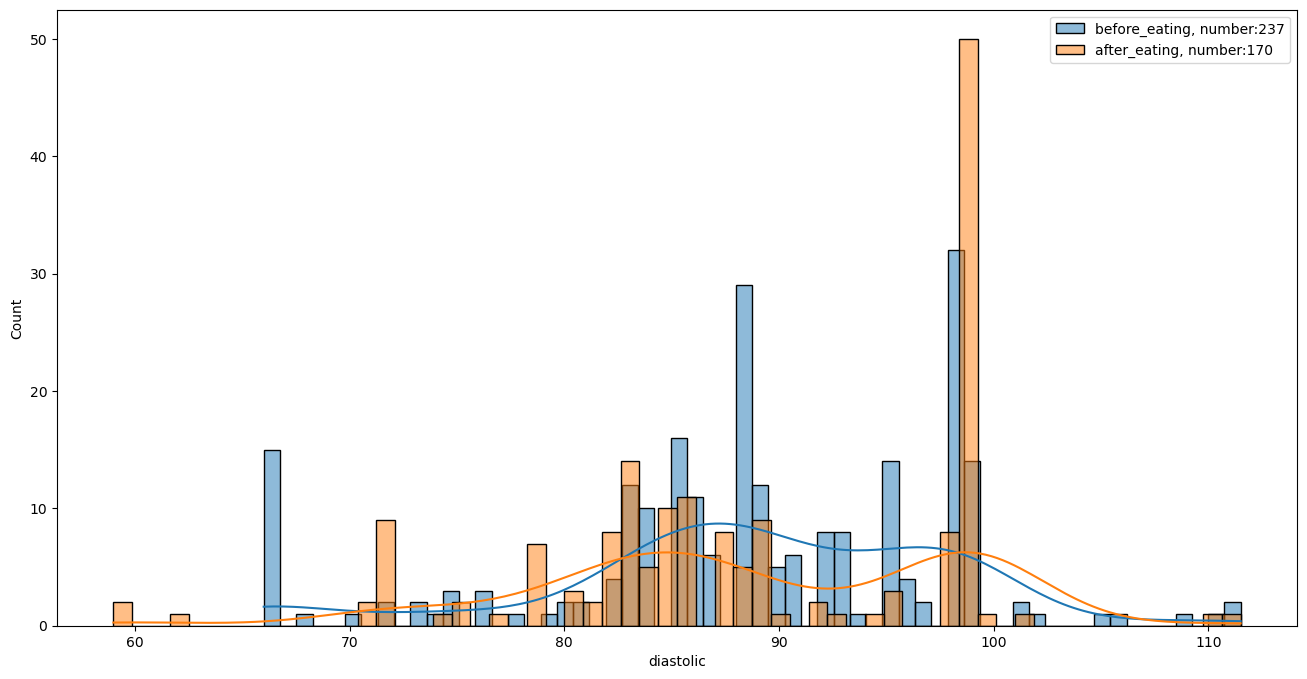

In [43]:
histplot('before_eating','after_eating',before_eating,after_eating,'diastolic',patient_stat)

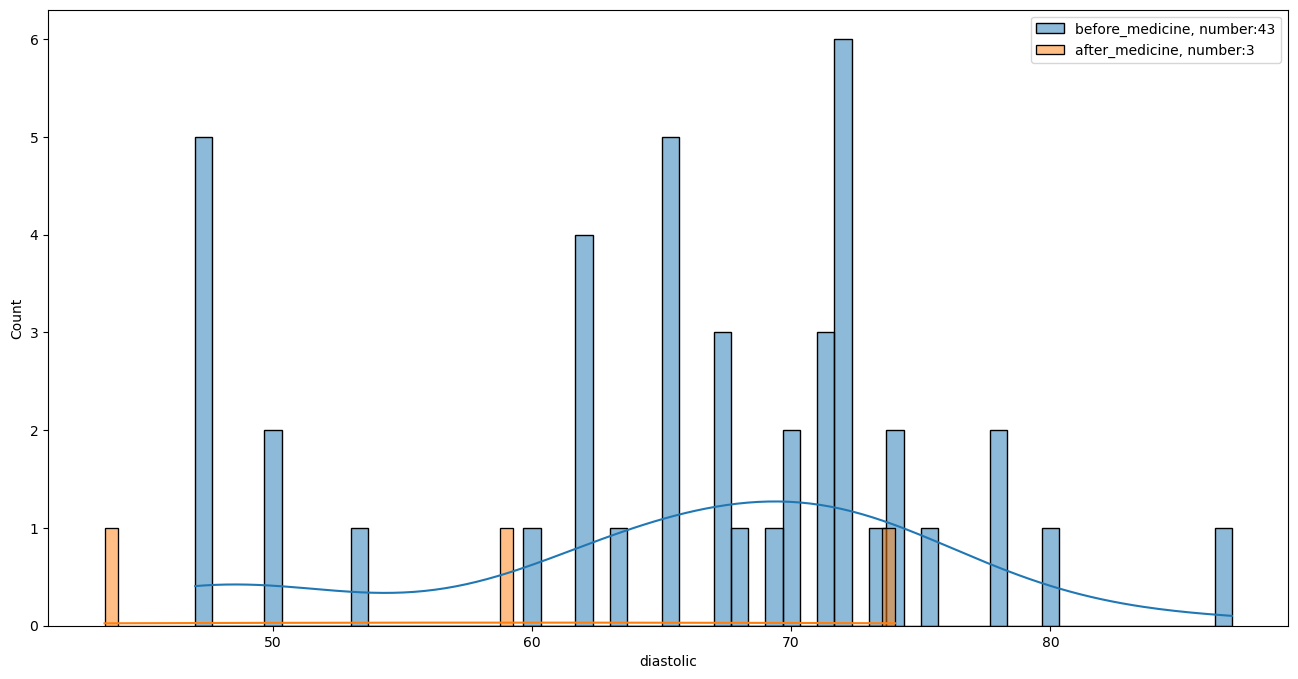

In [44]:
histplot('before_medicine','after_medicine',before_medicine,after_medicine,'diastolic',patient_stat)

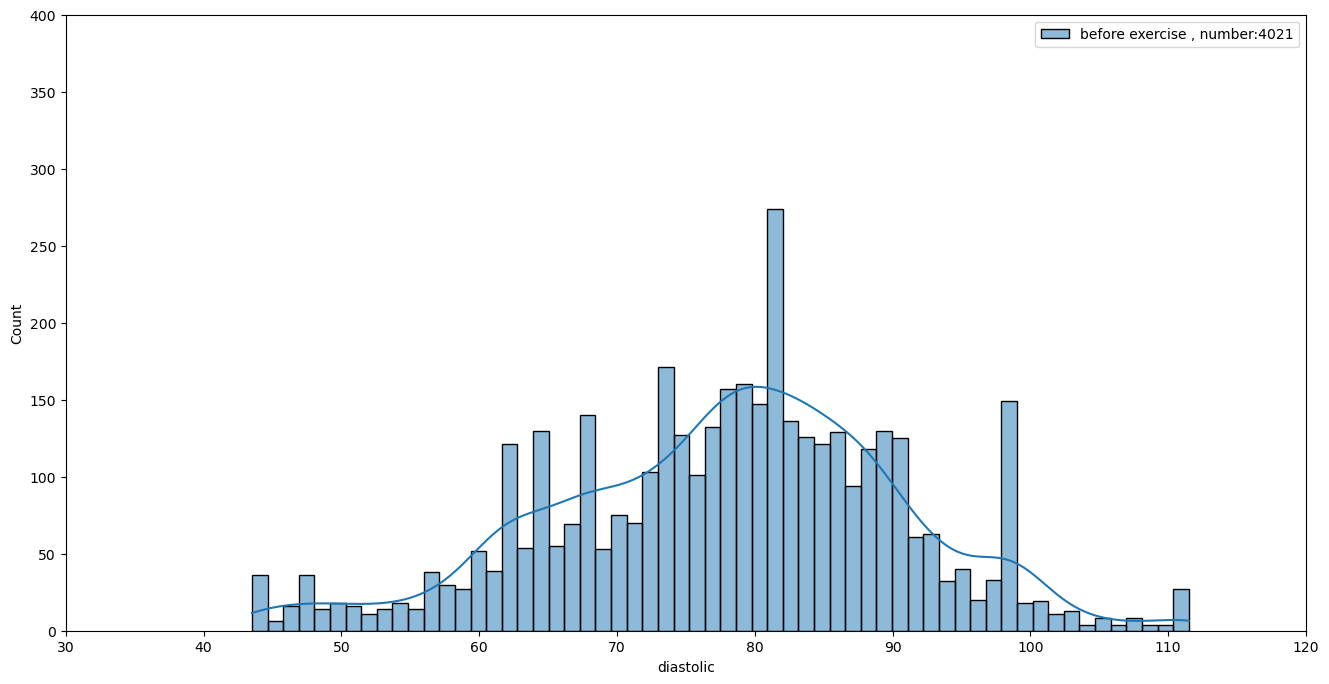

In [45]:
data2 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==False]
replace_with_thresholds(data2,'diastolic')
plt.figure(figsize = (16,8))
sbn.histplot(data=data2['diastolic'],bins=60, kde=True,label=f"before exercise , number:{len(data2)}")
plt.ylim(0, 400)
plt.xlim(30, 120)
plt.legend()

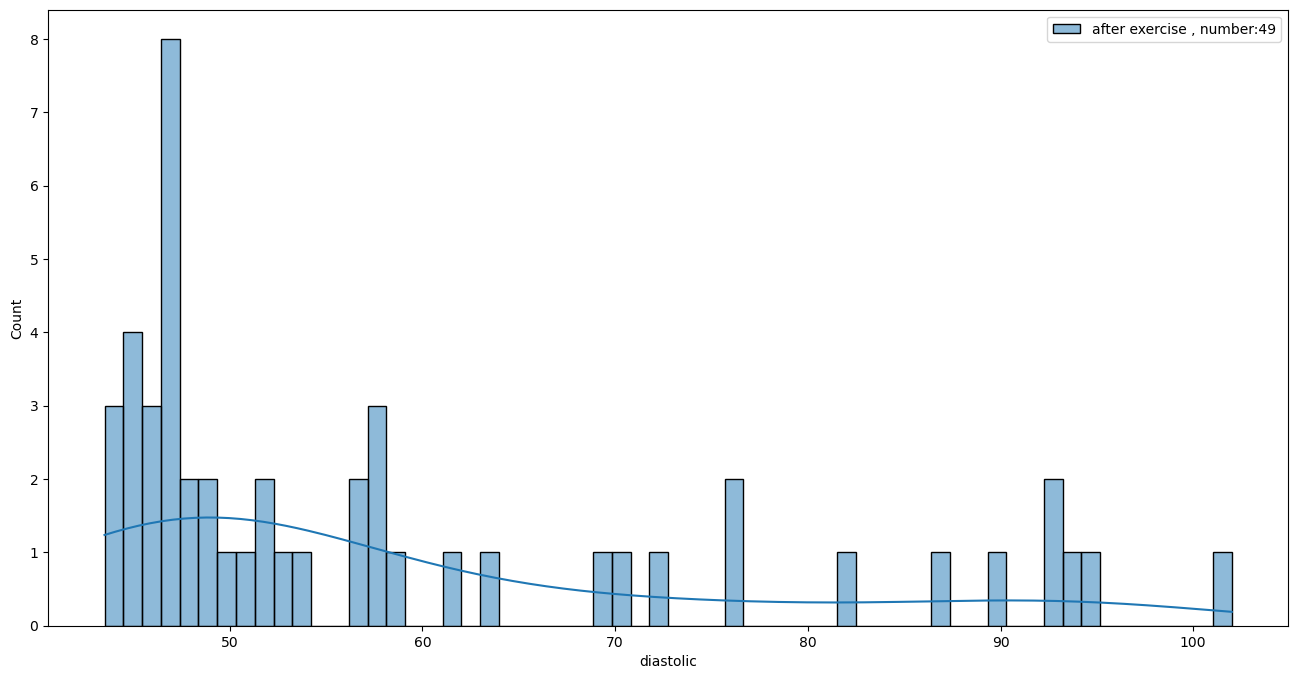

In [46]:
data1 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==True]
replace_with_thresholds(data1,'diastolic')
plt.figure(figsize = (16,8))
sbn.histplot(data=data1['diastolic'],bins=60, kde=True,label=f"after exercise , number:{len(data1)}")

plt.legend()

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_21607/130684917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


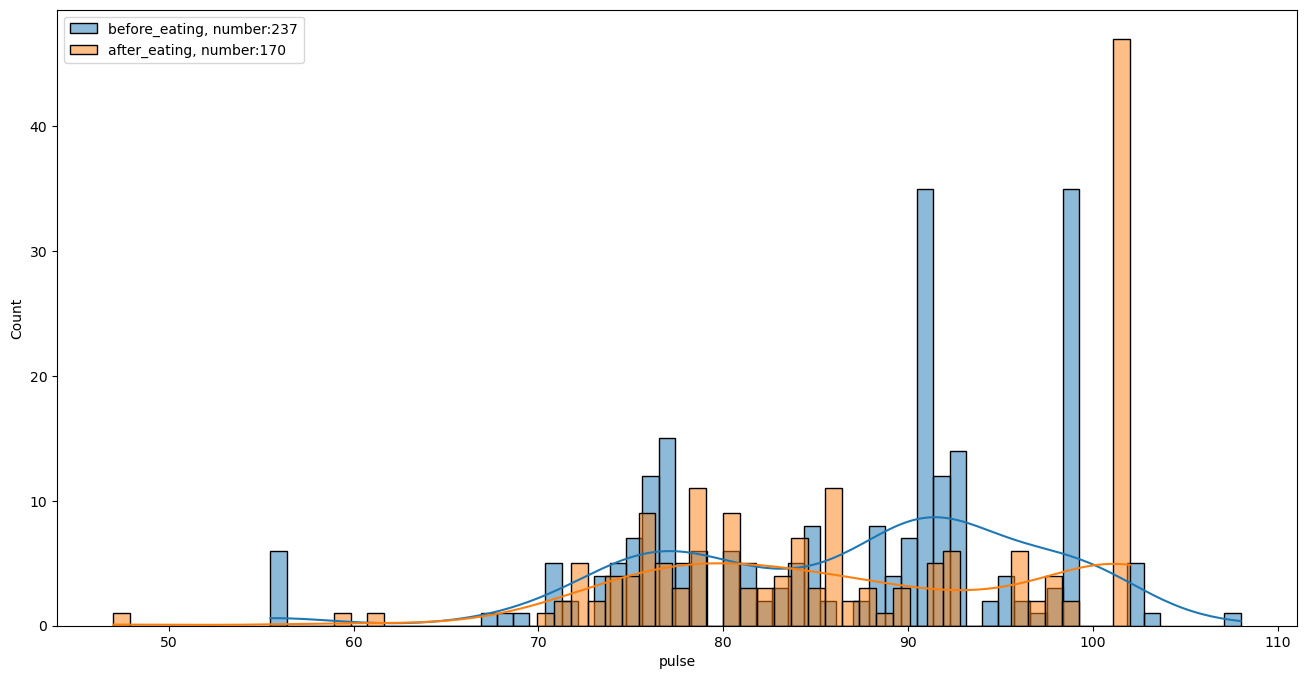

In [47]:
histplot('before_eating','after_eating',before_eating,after_eating,'pulse',patient_stat)

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_21607/130684917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


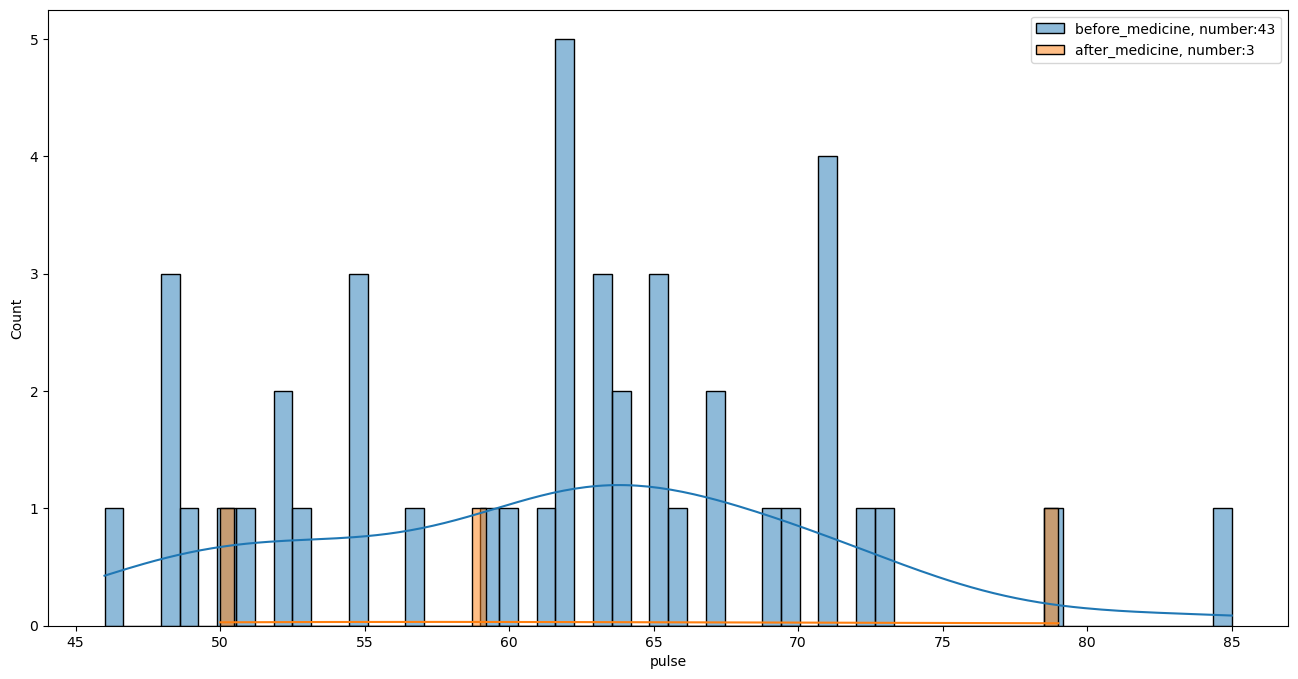

In [48]:
histplot('before_medicine','after_medicine',before_medicine,after_medicine,'pulse',patient_stat)

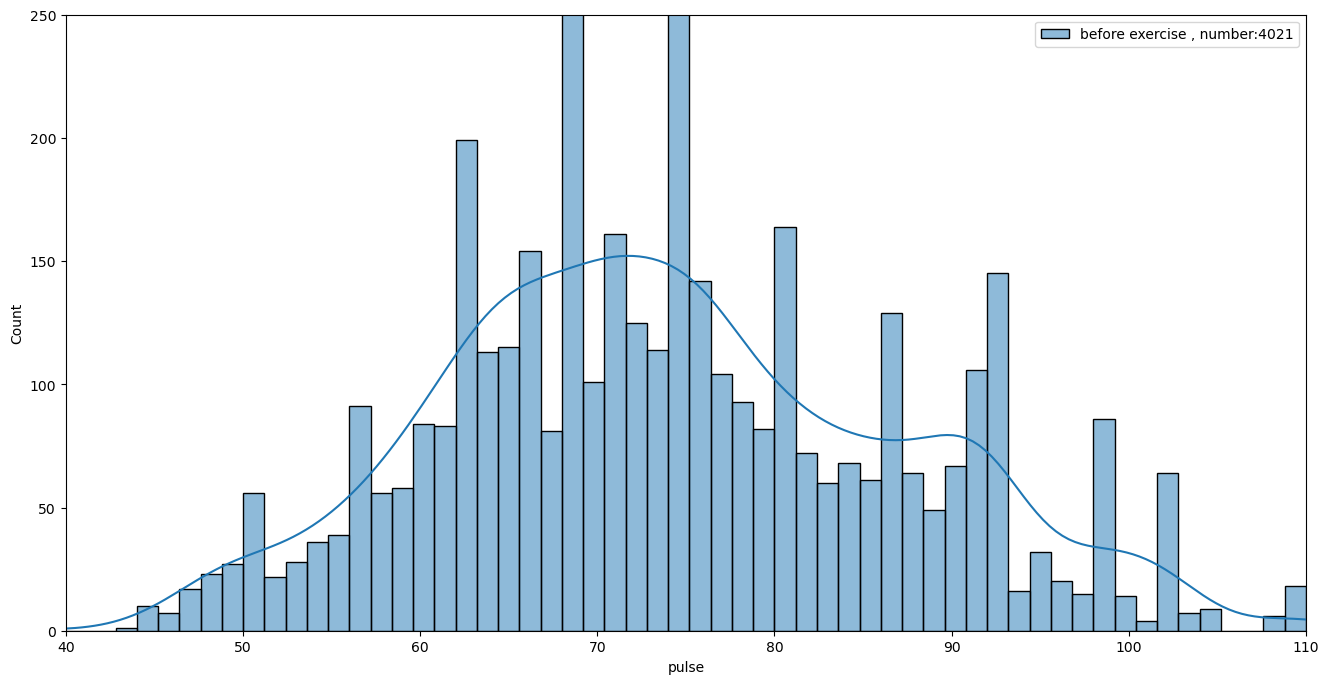

In [49]:
data2 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==False]
replace_with_thresholds(data2,'pulse')
plt.figure(figsize = (16,8))
sbn.histplot(data=data2['pulse'],bins=60, kde=True,label=f"before exercise , number:{len(data2)}")
plt.ylim(0, 250)
plt.xlim(40, 110)
plt.legend()

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_21607/130684917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


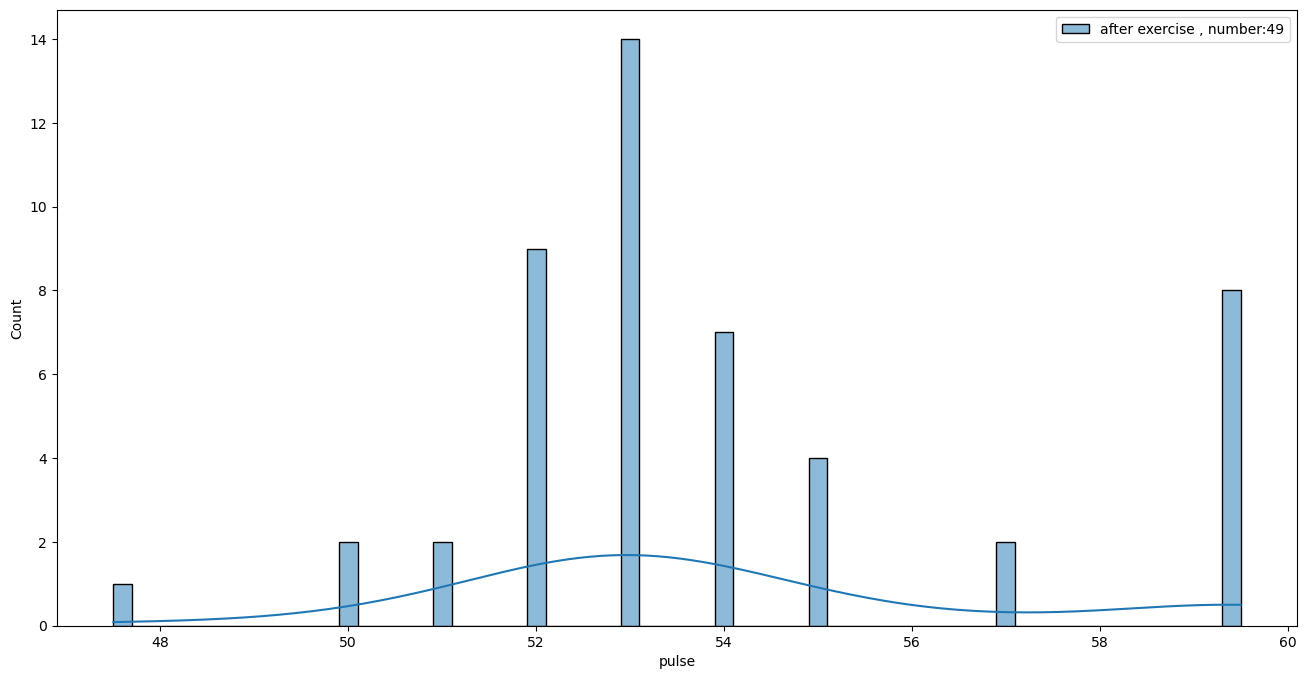

In [50]:
data1 = patient_stat[patient_stat['notes'].str.contains('|'.join(after_exercise),na=False)==True]
replace_with_thresholds(data1,'pulse')
plt.figure(figsize = (16,8))
sbn.histplot(data=data1['pulse'],bins=60, kde=True,label=f"after exercise , number:{len(data1)}")

plt.legend()

In [51]:
patientID = patient_stat['patientID'].unique()
patient_stat = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/bp_20220426.xlsx', index_col=0)
patient_stat = patient_stat.sort_values(by=['patientID'])
patient_stat = patient_stat.reset_index()

In [52]:
patient_stat['patientID'].value_counts()


14042    431
14487    301
14536    259
14593    253
14432    249
        ... 
14531      1
14527      1
14468      1
14484      1
14539      1
Name: patientID, Length: 90, dtype: int64

From above we can see each patient did measurement with different numbers , so i would like to find a average value for each variable

# average of value of each status from each patient

In [53]:
systolic = []
diastolic = []
pulse = []
for patient in patientID :
    sys = patient_stat.loc[patient_stat['patientID']==patient].systolic.mean()
    dia = patient_stat.loc[patient_stat['patientID']==patient].diastolic.mean()
    pul = patient_stat.loc[patient_stat['patientID']==patient].pulse.mean()
    systolic.append(sys)
    diastolic.append(dia)
    pulse.append(pul)

In [54]:
number_each_patient = []

for patient in patientID : 
    number = patient_stat['patientID'].value_counts()[patient]
    number_each_patient.append(number)

In [55]:
for patient in range(len(patientID)) : 
    patient_stat.loc[patient_stat['patientID']==patient]

In [56]:
intervals = []
for patient in patientID : 
    MIN = patient_stat.loc[patient_stat['patientID']==patient].recordTime.min()
    MAX = patient_stat.loc[patient_stat['patientID']==patient].recordTime.max()
    interval = [str(MIN)+' - '+str(MAX)]
    intervals.append(interval)

In [57]:
patient_stat.describe().T

,count,mean,std,min,25%,50%,75%,max
patientID,4070.0,14440.375676,149.128058,14042.0,14432.0,14487.0,14536.0,14614.0
systolic,4070.0,132.770762,199.639537,59.0,119.0,129.0,138.0,12822.0
diastolic,4070.0,77.735135,13.189737,0.0,69.0,79.0,86.0,131.0
pulse,4070.0,74.554791,22.963996,0.0,65.0,73.0,83.0,779.0


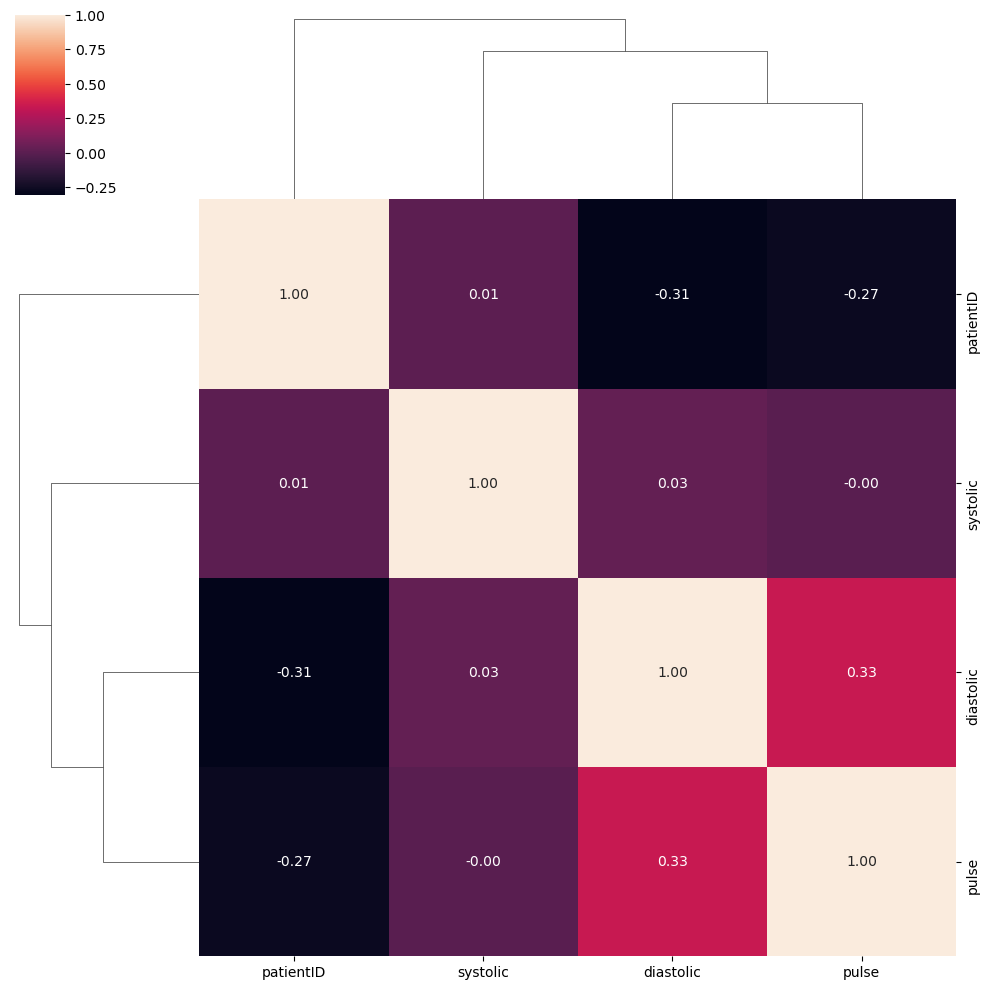

In [58]:
sbn.clustermap(patient_stat.corr(), annot = True, fmt = ".2f")

from heatmap we can see that diastolic has connection with pulse

<Axes: xlabel='diastolic', ylabel='pulse'>

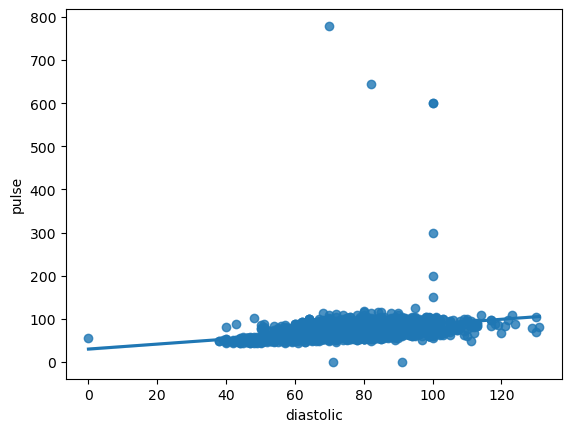

In [59]:
sbn.regplot(data = patient_stat, x="diastolic", y="pulse", ci=95)

In [60]:
dict = {'patientID':patientID,'intervals': intervals,'systolic':systolic,'diastolic':diastolic,'pulse':pulse} 
    
each_patient_stat = pd.DataFrame(dict)

In [61]:
each_patient_stat

,patientID,intervals,systolic,diastolic,pulse
0,14042,[2020-08-16 08:14:00 - 2021-10-01 15:50:16],122.009281,90.257541,92.129930
1,14341,[2021-09-29 15:30:19 - 2022-01-20 08:54:34],143.182796,84.215054,80.139785
2,14385,[2021-10-21 09:44:48 - 2021-11-30 09:23:24],131.000000,84.425000,66.350000
3,14386,[2021-10-21 10:23:49 - 2022-01-23 21:13:57],119.297297,67.918919,81.918919
4,14387,[2021-10-21 10:54:38 - 2021-10-21 11:00:17],164.500000,101.000000,99.000000
...,...,...,...,...,...
85,14570,[2021-12-17 15:44:32 - 2021-12-26 07:20:52],161.000000,76.666667,55.333333
86,14582,[2021-12-27 10:35:31 - 2022-01-24 09:31:01],125.981818,65.690909,71.281818
87,14589,[2021-12-29 14:47:46 - 2022-01-29 09:39:24],117.285714,71.000000,81.071429
88,14593,[2022-01-13 14:25:25 - 2022-04-21 20:24:13],131.347826,88.652174,78.308300


In [62]:
each_patient_stat['patientID']=each_patient_stat['patientID'].tolist()
new_patient['patientID'].dtypes

dtype('int64')

In [63]:
new_patient__each_patient_stat = new_patient.set_index('patientID').join(each_patient_stat.set_index('patientID'))

In [64]:
new_patient__each_patient_stat.isnull().sum()

gender         0
height         0
weight         0
smoking        0
life_style     0
age            0
intervals     16
systolic      16
diastolic     16
pulse         16
dtype: int64

In [65]:
len(new_patient__each_patient_stat)

104

In [66]:
each_patient_stat.columns

Index(['patientID', 'intervals', 'systolic', 'diastolic', 'pulse'], dtype='object')

In [67]:
new_patient__each_patient_stat = new_patient__each_patient_stat.dropna(axis=0, subset=\
                                                                       ['intervals', 'systolic', 'diastolic', 'pulse'])


In [68]:
len(new_patient__each_patient_stat)

88

In [69]:
print(f"data remaining {88/107} of original data")

data remaining 0.822429906542056 of original data


In [70]:
new_patient__each_patient_stat=new_patient__each_patient_stat.reset_index()

In [71]:
new_patient__each_patient_stat

,patientID,gender,height,weight,smoking,life_style,age,intervals,systolic,diastolic,pulse
0,14614,0,161.0,78.5,0,0.00,48,[2022-01-07 16:25:44 - 2022-01-20 07:24:41],142.727273,87.181818,69.363636
1,14593,1,168.0,84.0,0,1.20,38,[2022-01-13 14:25:25 - 2022-04-21 20:24:13],131.347826,88.652174,78.308300
2,14589,0,155.0,43.0,0,0.00,69,[2021-12-29 14:47:46 - 2022-01-29 09:39:24],117.285714,71.000000,81.071429
3,14582,0,165.0,86.0,0,1.55,68,[2021-12-27 10:35:31 - 2022-01-24 09:31:01],125.981818,65.690909,71.281818
4,14570,1,157.0,100.0,0,0.00,67,[2021-12-17 15:44:32 - 2021-12-26 07:20:52],161.000000,76.666667,55.333333
...,...,...,...,...,...,...,...,...,...,...,...
83,14388,1,163.0,65.0,0,0.00,61,[2021-10-21 11:18:22 - 2021-11-30 09:09:32],124.700000,85.760000,74.480000
84,14387,0,155.0,63.5,0,0.00,64,[2021-10-21 10:54:38 - 2021-10-21 11:00:17],164.500000,101.000000,99.000000
85,14386,1,180.0,80.0,0,1.55,66,[2021-10-21 10:23:49 - 2022-01-23 21:13:57],119.297297,67.918919,81.918919
86,14385,1,164.0,78.0,0,0.00,60,[2021-10-21 09:44:48 - 2021-11-30 09:23:24],131.000000,84.425000,66.350000


# 3. Glucose analysis

In [72]:
glucose = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/glucose_20220426.xlsx', index_col=0)
glucose

,glucoselevel,recordDateTime,mealtype,notes,deviceid,unit
patientID,,,,,,
14677,10.70,2022-04-25 23:39:32,AfterMeal,9.15 pm\nrice + chicken,manual,mmol/L
14677,14.40,2022-04-25 23:38:45,Fasting,fasting,manual,mmol/L
14645,11.90,2022-04-25 08:19:53,BeforeMeal,NaN,manual,mmol/L
14677,15.10,2022-04-23 22:32:27,AfterMeal,NaN,manual,mmol/L
14677,11.30,2022-04-23 22:31:52,Fasting,fastinv,manual,mmol/L
...,...,...,...,...,...,...
14511,6.82,2021-05-17 02:14:08,Other,NaN,meter+12893988,mmol/L
14042,6.22,2021-05-17 02:05:10,Other,NaN,meter+12893988,mmol/L
14511,6.22,2021-05-17 02:05:10,Other,NaN,meter+12893988,mmol/L


# EDA

In [73]:
eda(glucose)


    
    -- dtypes --
    
    glucoselevel             float64
recordDateTime    datetime64[ns]
mealtype                  object
notes                     object
deviceid                  object
unit                      object
dtype: object
    
    -- NaN Values --
    
    glucoselevel         0
recordDateTime       0
mealtype             0
notes             2288
deviceid             0
unit                 0
dtype: int64
    
    -- Shape --
    
    (2982, 6)
    
    -- Unique --
    
    glucoselevel       401
recordDateTime    2971
mealtype             5
notes              340
deviceid            45
unit                 1
dtype: int64
    
    -- Head --
    


,glucoselevel,recordDateTime,mealtype,notes,deviceid,unit
patientID,,,,,,
14677,10.7,2022-04-25 23:39:32,AfterMeal,9.15 pm\nrice + chicken,manual,mmol/L
14677,14.4,2022-04-25 23:38:45,Fasting,fasting,manual,mmol/L
14645,11.9,2022-04-25 08:19:53,BeforeMeal,NaN,manual,mmol/L
14677,15.1,2022-04-23 22:32:27,AfterMeal,NaN,manual,mmol/L
14677,11.3,2022-04-23 22:31:52,Fasting,fastinv,manual,mmol/L


In [74]:
glucose = glucose.sort_values(by=['patientID'])
glucose = glucose.sort_values(by=['recordDateTime'])

In [75]:
glucose[glucose['mealtype'].str.contains('Fasting',na=False)==True]

,glucoselevel,recordDateTime,mealtype,notes,deviceid,unit
patientID,,,,,,
14042,7.2,2021-07-20 10:25:00,Fasting,Enter by Teoh,manual,mmol/L
14042,6.8,2021-07-23 07:17:44,Fasting,NaN,manual,mmol/L
14042,6.5,2021-07-26 07:23:55,Fasting,NaN,manual,mmol/L
14042,13.0,2021-08-02 00:04:17,Fasting,Test add Akram,manual,mmol/L
14042,5.5,2021-08-03 07:10:05,Fasting,NaN,manual,mmol/L
...,...,...,...,...,...,...
14677,11.9,2022-04-19 22:37:54,Fasting,NaN,manual,mmol/L
14677,12.6,2022-04-20 22:20:23,Fasting,fasting,manual,mmol/L
14677,10.3,2022-04-22 00:00:51,Fasting,fasting,manual,mmol/L


In [76]:
glucose = glucose.reset_index()

In [77]:
glucose['patientID'].value_counts()

14042    173
14570    165
14443    158
14677    157
14389    129
14593    125
14410    121
14475    120
14386    117
14488    108
14559     95
14433     94
14414     90
14341     83
14549     78
14461     70
14498     64
14448     63
14481     60
14385     57
14403     56
14451     55
14426     51
14407     50
14501     50
14395     48
14645     48
14503     46
14409     38
14537     34
14454     33
14404     32
14449     32
14482     31
14425     29
14538     29
14483     29
14457     28
14592     23
14476     19
14557     15
14545     14
14489     13
14497      7
14511      7
14452      6
14535      6
14455      5
14541      5
14412      3
14441      3
14539      2
14468      1
14470      1
14531      1
14527      1
14522      1
14393      1
14496      1
14492      1
Name: patientID, dtype: int64

from above , we can see that each patient has imbalanced data 

In [78]:
measure_time = glucose['mealtype'].unique()
measure_time

array(['BeforeMeal', 'Other', 'AfterMeal', 'Fasting', 'BeforeBed'],
      dtype=object)

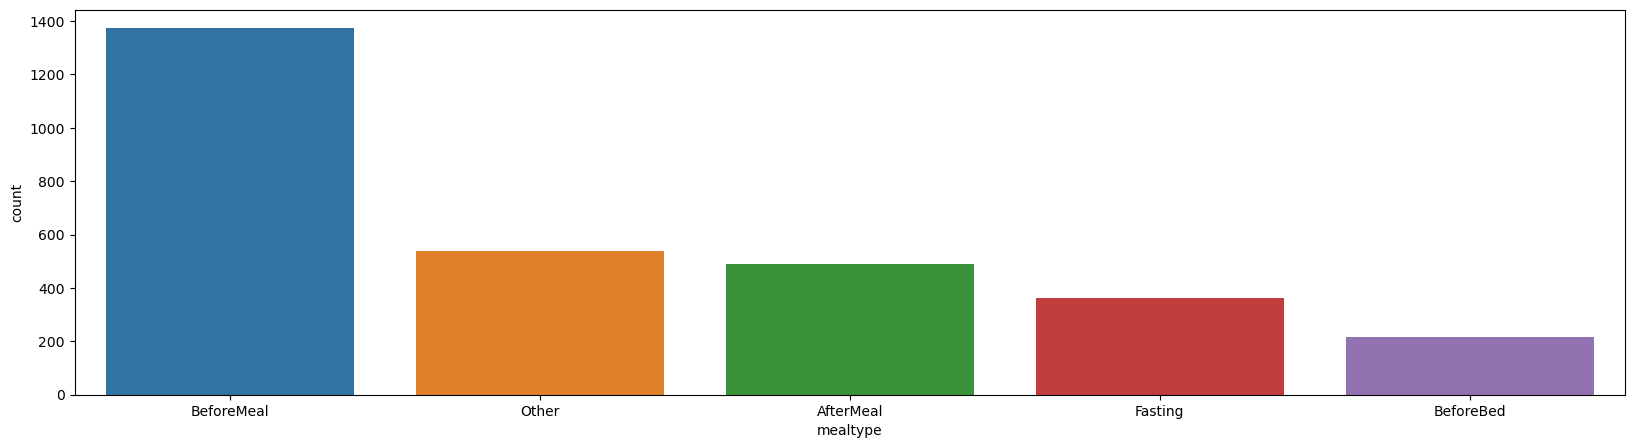

In [79]:
plt.figure(figsize=(20, 5))
sbn.countplot(x='mealtype', data=glucose)
plt.show()

In [80]:
glucose[glucose['mealtype'].str.contains('Other',na=False)==True]['patientID'].unique()

array([14511, 14042, 14389, 14385, 14403, 14410, 14404, 14409, 14426,
       14425, 14414, 14448, 14451, 14461, 14407, 14457, 14433, 14395,
       14482, 14481, 14488, 14489, 14483, 14475, 14449, 14545, 14497,
       14557, 14570, 14386, 14501, 14559, 14503])

In [81]:
data1 = glucose[glucose['mealtype'].str.contains('Other',na=False)==True].loc[glucose['patientID']==14042,['glucoselevel']]
data1['glucoselevel'].mean()


6.52

In [82]:
if(glucose['mealtype'].str.contains('Other',na=False).all()!=False):
    data1 = glucose[glucose['mealtype'].str.contains('Other',na=False)==True]['glucoselevel'][14341].mean()
    print(data1)

# Average value of each status from each patient

In [83]:
average_glucoselevel = []
for patient in patientID : 
    each = []
    
    data1 = glucose[glucose['mealtype'].str.contains('AfterMeal',na=False)==True].loc[glucose['patientID']==patient,['glucoselevel']]\
.mean()
   # print('{} mean of glucoselevel: {} after glucoselevel'.format(patient,data1))

    data2 = glucose[glucose['mealtype'].str.contains('Fasting',na=False)==True].loc[glucose['patientID']==patient,['glucoselevel']]\
.mean()

    data3 = glucose[glucose['mealtype'].str.contains('BeforeMeal',na=False)==True].loc[glucose['patientID']==patient,['glucoselevel']]\
.mean()

    data4 = glucose[glucose['mealtype'].str.contains('BeforeBed',na=False)==True].loc[glucose['patientID']==patient,['glucoselevel']]\
.mean()


    data5 = glucose[glucose['mealtype'].str.contains('Other',na=False)==True].loc[glucose['patientID']==patient,['glucoselevel']]\
.mean()
    average_glucoselevel.append([patient,data3,data1,data2,data4,data5])


In [84]:
average_glucoselevel

[[14042,
  glucoselevel    7.213158
  dtype: float64,
  glucoselevel    8.745238
  dtype: float64,
  glucoselevel    6.444
  dtype: float64,
  glucoselevel    9.966667
  dtype: float64,
  glucoselevel    6.52
  dtype: float64],
 [14341,
  glucoselevel    6.07
  dtype: float64,
  glucoselevel    7.509231
  dtype: float64,
  glucoselevel    5.469615
  dtype: float64,
  glucoselevel    7.7
  dtype: float64,
  glucoselevel   NaN
  dtype: float64],
 [14385,
  glucoselevel    6.993514
  dtype: float64,
  glucoselevel    9.753529
  dtype: float64,
  glucoselevel   NaN
  dtype: float64,
  glucoselevel    6.5
  dtype: float64,
  glucoselevel    7.1
  dtype: float64],
 [14386,
  glucoselevel    9.230714
  dtype: float64,
  glucoselevel    12.526667
  dtype: float64,
  glucoselevel    7.579487
  dtype: float64,
  glucoselevel    12.282182
  dtype: float64,
  glucoselevel    14.216667
  dtype: float64],
 [14387,
  glucoselevel   NaN
  dtype: float64,
  glucoselevel   NaN
  dtype: float64,
  glucos

In [85]:
columns = ['ID','BeforeMeal','AfterMeal','Fasting','BeforeBed','Other']
glucoselevel_each = pd.DataFrame(average_glucoselevel,columns = columns)
glucoselevel_each

,ID,BeforeMeal,AfterMeal,Fasting,BeforeBed,Other
0,14042,glucoselevel 7.213158 dtype: float64,glucoselevel 8.745238 dtype: float64,glucoselevel 6.444 dtype: float64,glucoselevel 9.966667 dtype: float64,glucoselevel 6.52 dtype: float64
1,14341,glucoselevel 6.07 dtype: float64,glucoselevel 7.509231 dtype: float64,glucoselevel 5.469615 dtype: float64,glucoselevel 7.7 dtype: float64,glucoselevel NaN dtype: float64
2,14385,glucoselevel 6.993514 dtype: float64,glucoselevel 9.753529 dtype: float64,glucoselevel NaN dtype: float64,glucoselevel 6.5 dtype: float64,glucoselevel 7.1 dtype: float64
3,14386,glucoselevel 9.230714 dtype: float64,glucoselevel 12.526667 dtype: float64,glucoselevel 7.579487 dtype: float64,glucoselevel 12.282182 dtype: float64,glucoselevel 14.216667 dtype: float64
4,14387,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64
...,...,...,...,...,...,...
85,14570,glucoselevel 9.029211 dtype: float64,glucoselevel 23.103333 dtype: float64,glucoselevel 17.1 dtype: float64,glucoselevel NaN dtype: float64,glucoselevel 9.303095 dtype: float64
86,14582,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64
87,14589,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64
88,14593,glucoselevel 5.622778 dtype: float64,glucoselevel 6.423529 dtype: float64,glucoselevel 5.685 dtype: float64,glucoselevel NaN dtype: float64,glucoselevel NaN dtype: float64


In [86]:
columns = ['BeforeMeal','AfterMeal','Fasting','BeforeBed','Other']
    
for i in columns:
    glucoselevel_each[i] = glucoselevel_each[i].apply(lambda x: \
        str(x))
    glucoselevel_each[i] = glucoselevel_each[i].apply(lambda x: \
        x.split(' ')[4])
    glucoselevel_each[i] = glucoselevel_each[i].apply(lambda x: \
        x.split('\n')[0])
    glucoselevel_each[i] = glucoselevel_each[i].apply(lambda x: \
        x.replace('float64','0'))
    glucoselevel_each[i] = glucoselevel_each[i].apply(lambda x: \
        float(x))


In [87]:
import numpy as np
print(len(glucoselevel_each))
glucoselevel_each

90


,ID,BeforeMeal,AfterMeal,Fasting,BeforeBed,Other
0,14042,7.213158,8.745238,6.444000,9.966667,6.520000
1,14341,6.070000,7.509231,5.469615,7.700000,0.000000
2,14385,6.993514,9.753529,0.000000,6.500000,7.100000
3,14386,9.230714,12.526667,7.579487,12.282182,14.216667
4,14387,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
85,14570,9.029211,23.103333,17.100000,0.000000,9.303095
86,14582,0.000000,0.000000,0.000000,0.000000,0.000000
87,14589,0.000000,0.000000,0.000000,0.000000,0.000000
88,14593,5.622778,6.423529,5.685000,0.000000,0.000000


Using interpolate(method = linear) to fill empty cells

In [88]:
glucoselevel_each[['BeforeMeal','AfterMeal']] = glucoselevel_each[['BeforeMeal','AfterMeal']].replace(0.0, np.nan).interpolate()
glucoselevel_each = glucoselevel_each.drop(['Other'],axis=1)
glucoselevel_each = glucoselevel_each.set_index('ID')

glucoselevel_each[['Fasting','BeforeBed']] = glucoselevel_each[['Fasting','BeforeBed']].replace(0.0, np.nan)
glucoselevel_each = glucoselevel_each.T
glucoselevel_each = glucoselevel_each.interpolate()


glucoselevel_each = glucoselevel_each.T
glucoselevel_each = glucoselevel_each.reset_index()
glucoselevel_each


,ID,BeforeMeal,AfterMeal,Fasting,BeforeBed
0,14042,7.213158,8.745238,6.444000,9.966667
1,14341,6.070000,7.509231,5.469615,7.700000
2,14385,6.993514,9.753529,8.126765,6.500000
3,14386,9.230714,12.526667,7.579487,12.282182
4,14387,8.499567,11.460000,11.460000,11.460000
...,...,...,...,...,...
85,14570,9.029211,23.103333,17.100000,17.100000
86,14582,7.893733,17.543398,17.543398,17.543398
87,14589,6.758256,11.983464,11.983464,11.983464
88,14593,5.622778,6.423529,5.685000,5.685000


Other is not specific , so it was removed , and leave row if there is any numeric value is indicated
and use interpolate api to automatically create missing value to do fill the cell 

In [89]:
new_patient__each_patient_stat__glucoselevel_each = \
new_patient__each_patient_stat.set_index('patientID')\
.join(glucoselevel_each.set_index('ID'))
new_patient__each_patient_stat__glucoselevel_each['intervals'] = \
new_patient__each_patient_stat__glucoselevel_each['intervals'].apply(lambda x: x[0])
new_patient__each_patient_stat__glucoselevel_each=new_patient__each_patient_stat__glucoselevel_each.reset_index()
new_patient__each_patient_stat__glucoselevel_each

,patientID,gender,height,weight,smoking,life_style,age,intervals,systolic,diastolic,pulse,BeforeMeal,AfterMeal,Fasting,BeforeBed
0,14614,0,161.0,78.5,0,0.00,48,2022-01-07 16:25:44 - 2022-01-20 07:24:41,142.727273,87.181818,69.363636,5.622778,6.423529,6.423529,6.423529
1,14593,1,168.0,84.0,0,1.20,38,2022-01-13 14:25:25 - 2022-04-21 20:24:13,131.347826,88.652174,78.308300,5.622778,6.423529,5.685000,5.685000
2,14589,0,155.0,43.0,0,0.00,69,2021-12-29 14:47:46 - 2022-01-29 09:39:24,117.285714,71.000000,81.071429,6.758256,11.983464,11.983464,11.983464
3,14582,0,165.0,86.0,0,1.55,68,2021-12-27 10:35:31 - 2022-01-24 09:31:01,125.981818,65.690909,71.281818,7.893733,17.543398,17.543398,17.543398
4,14570,1,157.0,100.0,0,0.00,67,2021-12-17 15:44:32 - 2021-12-26 07:20:52,161.000000,76.666667,55.333333,9.029211,23.103333,17.100000,17.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,14388,1,163.0,65.0,0,0.00,61,2021-10-21 11:18:22 - 2021-11-30 09:09:32,124.700000,85.760000,74.480000,7.768420,10.393334,10.393334,10.393334
84,14387,0,155.0,63.5,0,0.00,64,2021-10-21 10:54:38 - 2021-10-21 11:00:17,164.500000,101.000000,99.000000,8.499567,11.460000,11.460000,11.460000
85,14386,1,180.0,80.0,0,1.55,66,2021-10-21 10:23:49 - 2022-01-23 21:13:57,119.297297,67.918919,81.918919,9.230714,12.526667,7.579487,12.282182
86,14385,1,164.0,78.0,0,0.00,60,2021-10-21 09:44:48 - 2021-11-30 09:23:24,131.000000,84.425000,66.350000,6.993514,9.753529,8.126765,6.500000


In [90]:
size = len(new_patient__each_patient_stat__glucoselevel_each)
print(f"data remaining {size/107} of original data")

data remaining 0.822429906542056 of original data


# 4. medicine_status

In [91]:
medicine_status = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/mymedicine_20220426.xlsx', index_col=0)
medicine_status =medicine_status.reset_index()
medicine_status.groupby(['userID','startDate'])


# EDA

In [92]:
eda(medicine_status)


    
    -- dtypes --
    
    userID                       int64
medicineID                   int64
medicineTake                object
medicineTakeType            object
unit                        object
dosageUnit                  object
instruction                 object
days                        object
timingPerDay                object
startDate           datetime64[ns]
endDate             datetime64[ns]
dtype: object
    
    -- NaN Values --
    
    userID              0
medicineID          0
medicineTake        0
medicineTakeType    0
unit                0
dosageUnit          0
instruction         0
days                0
timingPerDay        0
startDate           0
endDate             0
dtype: int64
    
    -- Shape --
    
    (203, 11)
    
    -- Unique --
    
    userID              70
medicineID          62
medicineTake        61
medicineTakeType    21
unit                 8
dosageUnit           6
instruction          5
days                 6
timingPerDay        34
s

,userID,medicineID,medicineTake,medicineTakeType,unit,dosageUnit,instruction,days,timingPerDay,startDate,endDate
0,14645,479,fenofibrate 200mg,lipid-regulating drug,mg,capsule,After Food,"sun,mon,tue,wed,thr,fri,sat",22:01:00,2022-01-13,2023-01-13
1,14645,104,atorvastatin 40mg,statin,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",22:00:00,2022-01-13,2023-01-13
2,14645,779,metformin 850mg,antidiabetic,mg,tablet,After Food,"sun,mon,tue,wed,thr,fri,sat",08:00:00,2022-01-13,2023-01-13
3,14645,955,perindopril 4mg tab,antihypertensive,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",07:00:00,2022-01-13,2023-01-13
4,14593,955,perindopril 4mg tab,antihypertensive,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",08:00:00,2021-12-24,2022-03-30


# preprocessing

1.days into number of pill consumption per week

2.timingPerDay into number of pill consumption per day

3.startDate,endDate to period of pill consumption

4.unify the word of instruction

In [93]:
medicine_status = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/mymedicine_20220426.xlsx', index_col=0)

medicine_status['days'] = medicine_status['days'].apply(lambda x: \
        str(x))

medicine_status['days'] = medicine_status['days'].apply(lambda x: \
        x.split(','))
medicine_status['days'] = medicine_status['days'].apply(lambda x: \
        len(x))
medicine_status['sum_day'] = medicine_status['endDate']-medicine_status['startDate']
medicine_status['sum_day'] = medicine_status['sum_day'].apply(lambda x: str(x))
medicine_status['sum_day'] = medicine_status['sum_day'].apply(lambda x: x.split(' ')[0])
medicine_status.drop(['startDate','endDate'], axis='columns', inplace=True)
medicine_status['timingPerDay'] = medicine_status['timingPerDay'].apply(lambda x: \
        len(str(x).split(',')))
medicine_status['instruction'] = medicine_status['instruction'].apply(lambda x:\
                                                       x.replace('No Food Instructions','No Food Instruction'))
new_medicine_status = medicine_status[['medicineTake','medicineTakeType','instruction','days','timingPerDay','sum_day']]
new_medicine_status = new_medicine_status.reset_index()

new_medicine_status



,userID,medicineTake,medicineTakeType,instruction,days,timingPerDay,sum_day
0,14645,fenofibrate 200mg,lipid-regulating drug,After Food,7,1,365
1,14645,atorvastatin 40mg,statin,Before Food,7,1,365
2,14645,metformin 850mg,antidiabetic,After Food,7,1,365
3,14645,perindopril 4mg tab,antihypertensive,Before Food,7,1,365
4,14593,perindopril 4mg tab,antihypertensive,Before Food,7,1,96
...,...,...,...,...,...,...,...
198,14042,aciclovir 200mg,antiviral,Before Food,4,1,31
199,14042,abciximab 10mg/5mL,antiplatelet,Before Food,4,1,365
200,14042,alfacalcidol 1MCG,drug affecting bone metabolism/ vitamin D,After Food,7,2,396
201,14042,labetalol 25mg,antihypertensive,Before Food,7,1,365


Check if there is duplicated index

In [94]:
new_medicine_status[~new_medicine_status.index.duplicated()]

,userID,medicineTake,medicineTakeType,instruction,days,timingPerDay,sum_day
0,14645,fenofibrate 200mg,lipid-regulating drug,After Food,7,1,365
1,14645,atorvastatin 40mg,statin,Before Food,7,1,365
2,14645,metformin 850mg,antidiabetic,After Food,7,1,365
3,14645,perindopril 4mg tab,antihypertensive,Before Food,7,1,365
4,14593,perindopril 4mg tab,antihypertensive,Before Food,7,1,96
...,...,...,...,...,...,...,...
198,14042,aciclovir 200mg,antiviral,Before Food,4,1,31
199,14042,abciximab 10mg/5mL,antiplatelet,Before Food,4,1,365
200,14042,alfacalcidol 1MCG,drug affecting bone metabolism/ vitamin D,After Food,7,2,396
201,14042,labetalol 25mg,antihypertensive,Before Food,7,1,365


only take medicine name without dose usage to count the number 

In [95]:
new_medicine_status['medicineTake'] = new_medicine_status['medicineTake']\
.apply(lambda x: str(x).split(' ')[0])
                                                                                                                                                                                                                         

In [96]:
new_medicine_status['medicineTakeType'].unique()

array(['lipid-regulating drug', 'statin', 'antidiabetic',
       'antihypertensive', 'antiplatelet', 'antithyroid', 'antianginal',
       'antihyperlipidemic', 'diuretic', 'benign prostate hyperplasia',
       'drug for benign prostate hyperplasia',
       'antisecretory, proton pump inhibitor', 'antigout',
       'calcium regulator', 'antibiotic', 'NSAID', 'analgesic',
       'antiviral', 'antiepileptic',
       'drug affecting bone metabolism/ vitamin D', 'antirheumatic'],
      dtype=object)

In [97]:
new_medicine_status['userID'].value_counts()
#new_medicine_status.groupby(by=["userID"]).apply(lambda x: len(x))

14042    16
14511     8
14593     8
14386     7
14410     7
         ..
14524     1
14455     1
14454     1
14452     1
14484     1
Name: userID, Length: 70, dtype: int64

In [98]:
len(new_medicine_status['medicineTakeType'].unique())

21

In [99]:
len(new_medicine_status['medicineTake'].unique())

43

In [100]:
new_medicine_status['medicineTakeType'].value_counts()
#new_medicine_status.groupby(by=["medicineTakeType"]).apply(lambda x: len(x))

antidiabetic                                 65
antihypertensive                             44
antianginal                                  25
antihyperlipidemic                           17
statin                                       15
antiplatelet                                 14
diuretic                                      4
lipid-regulating drug                         2
antithyroid                                   2
antiviral                                     2
analgesic                                     2
antibiotic                                    2
NSAID                                         1
drug affecting bone metabolism/ vitamin D     1
antiepileptic                                 1
drug for benign prostate hyperplasia          1
calcium regulator                             1
antigout                                      1
antisecretory, proton pump inhibitor          1
benign prostate hyperplasia                   1
antirheumatic                           

In [101]:
new_medicine_status = new_medicine_status.drop(['medicineTake','instruction','days','timingPerDay','sum_day'],axis = 1)


convert categorized value to dummy/indicator variables

In [102]:
new_new_medicine_status = pd.get_dummies(new_medicine_status,'medicineTakeType')
new_new_medicine_status = pd.get_dummies(new_medicine_status, columns=['medicineTakeType'], prefix='', prefix_sep='')\
.groupby('userID').max().reset_index()


In [103]:
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status = \
new_patient__each_patient_stat__glucoselevel_each.set_index('patientID')\
.join(new_new_medicine_status.set_index('userID'))
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status.replace(np.nan,0)
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status

,gender,height,weight,smoking,life_style,age,intervals,systolic,diastolic,pulse,...,"antisecretory, proton pump inhibitor",antithyroid,antiviral,benign prostate hyperplasia,calcium regulator,diuretic,drug affecting bone metabolism/ vitamin D,drug for benign prostate hyperplasia,lipid-regulating drug,statin
patientID,,,,,,,,,,,,,,,,,,,,,
14614,0,161.0,78.5,0,0.00,48,2022-01-07 16:25:44 - 2022-01-20 07:24:41,142.727273,87.181818,69.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14593,1,168.0,84.0,0,1.20,38,2022-01-13 14:25:25 - 2022-04-21 20:24:13,131.347826,88.652174,78.308300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14589,0,155.0,43.0,0,0.00,69,2021-12-29 14:47:46 - 2022-01-29 09:39:24,117.285714,71.000000,81.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14582,0,165.0,86.0,0,1.55,68,2021-12-27 10:35:31 - 2022-01-24 09:31:01,125.981818,65.690909,71.281818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14570,1,157.0,100.0,0,0.00,67,2021-12-17 15:44:32 - 2021-12-26 07:20:52,161.000000,76.666667,55.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14388,1,163.0,65.0,0,0.00,61,2021-10-21 11:18:22 - 2021-11-30 09:09:32,124.700000,85.760000,74.480000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14387,0,155.0,63.5,0,0.00,64,2021-10-21 10:54:38 - 2021-10-21 11:00:17,164.500000,101.000000,99.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14386,1,180.0,80.0,0,1.55,66,2021-10-21 10:23:49 - 2022-01-23 21:13:57,119.297297,67.918919,81.918919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status.reset_index()
print(f"data remaining {len(new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status)/107} of original data")

data remaining 0.822429906542056 of original data


# 5. medicine_time(no medicine )

In [105]:
medicine_time = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/mymedicine_status_20220426.xlsx', index_col=0)
medicine_time=medicine_time.reset_index()
medicine_time.groupby(['userID','myMedicineID']).sum()


status
userID myMedicineID        
14042  1817             202
       1818              45
       1819             553
       1846              71
       1847              98
...                     ...
14593  2249              61
14645  2237             188
       2238             198
       2240             195
       2241             189

[171 rows x 1 columns]

# EDA 

In [106]:
#len(medicine_time['userID'].unique())
eda(medicine_time)


    
    -- dtypes --
    
    userID                   int64
myMedicineID             int64
dateTime        datetime64[ns]
status                   int64
timeTaken       datetime64[ns]
reason                  object
dtype: object
    
    -- NaN Values --
    
    userID             0
myMedicineID       0
dateTime           0
status             0
timeTaken       4151
reason          6606
dtype: int64
    
    -- Shape --
    
    (7059, 6)
    
    -- Unique --
    
    userID            59
myMedicineID     171
dateTime        3382
status             3
timeTaken        761
reason            10
dtype: int64
    
    -- Head --
    


,userID,myMedicineID,dateTime,status,timeTaken,reason
0,14042,1817,2021-03-26 08:00:00,1,2021-09-02 09:41:00,NaN
1,14042,1817,2021-03-27 08:00:00,1,2021-09-02 09:41:00,NaN
2,14042,1817,2021-03-28 08:00:00,1,2021-09-02 09:41:00,NaN
3,14042,1817,2021-03-29 08:00:00,1,2021-09-02 09:41:00,NaN
4,14042,1817,2021-03-30 08:00:00,1,2021-09-02 09:41:00,NaN


In [107]:
#from table medicine_status
print(len(medicine_status['medicineTake'].unique()))
#from table medicine_time
len(medicine_time['myMedicineID'].unique())

61


171

#i thought medicineID match pillname

#but their unique values do not match ,so myMedicineID is considered to be like ID number of each diagnosis

#so i am going to ignore this data 

In [108]:
#status is unknown 
medicine_time['status'].value_counts()

2    4167
1    2437
0     455
Name: status, dtype: int64

In [109]:
medicine_time[medicine_time['userID']==14500]['status'].value_counts()

2    391
1      1
Name: status, dtype: int64

# 6. patient_illness

In [110]:

patient_illness = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/patientIllness_20220426.xlsx', index_col=0)
patient_illness = patient_illness.reset_index()
patient_illness.groupby(['patientID','disease'])


# EDA

In [111]:
eda(patient_illness)


    
    -- dtypes --
    
    patientID                 int64
disease                   int64
dietControl               int64
oralAntidiabetics         int64
insulin                   int64
basalBolusInsulin         int64
preMixedInsulinBD         int64
preMixedInsulinTDS        int64
notControlledTreatment    int64
wellControlled            int64
dtype: object
    
    -- NaN Values --
    
    patientID                 0
disease                   0
dietControl               0
oralAntidiabetics         0
insulin                   0
basalBolusInsulin         0
preMixedInsulinBD         0
preMixedInsulinTDS        0
notControlledTreatment    0
wellControlled            0
dtype: int64
    
    -- Shape --
    
    (106, 10)
    
    -- Unique --
    
    patientID                 106
disease                     4
dietControl                 2
oralAntidiabetics           2
insulin                     2
basalBolusInsulin           2
preMixedInsulinBD           2
preMixedInsulinTDS       

,patientID,disease,dietControl,oralAntidiabetics,insulin,basalBolusInsulin,preMixedInsulinBD,preMixedInsulinTDS,notControlledTreatment,wellControlled
0,14677,1,0,0,0,0,1,0,0,0
1,14645,1,0,0,1,0,0,0,0,0
2,14614,2,0,0,0,0,0,0,1,0
3,14593,3,0,1,0,0,0,0,1,0
4,14592,1,0,0,0,0,1,0,0,0


In [112]:
# use this as target/Y
patient_illness['disease'].value_counts()

3    51
2    40
1    13
0     2
Name: disease, dtype: int64

In [113]:
patient_illness.columns

Index(['patientID', 'disease', 'dietControl', 'oralAntidiabetics', 'insulin',
       'basalBolusInsulin', 'preMixedInsulinBD', 'preMixedInsulinTDS',
       'notControlledTreatment', 'wellControlled'],
      dtype='object')

'疾病'、'飲食控制'、'口服抗糖尿病藥'、'胰島素'、'基礎推注胰島素'、'預混合胰島素 twice a day'、'預混合胰島素 three times a day'、'不受控制的治療'、'控制良好'

In [114]:
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status.reset_index()
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status.set_index('patientID')\
.join(patient_illness.set_index('patientID'))
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness.replace(np.nan,0)
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness.reset_index()
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness.head(2)

,patientID,gender,height,weight,smoking,life_style,age,intervals,systolic,diastolic,...,statin,disease,dietControl,oralAntidiabetics,insulin,basalBolusInsulin,preMixedInsulinBD,preMixedInsulinTDS,notControlledTreatment,wellControlled
0,14614,0,161.0,78.5,0,0.0,48,2022-01-07 16:25:44 - 2022-01-20 07:24:41,142.727273,87.181818,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,14593,1,168.0,84.0,0,1.2,38,2022-01-13 14:25:25 - 2022-04-21 20:24:13,131.347826,88.652174,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
patient_illness[patient_illness['patientID']==14593]

,patientID,disease,dietControl,oralAntidiabetics,insulin,basalBolusInsulin,preMixedInsulinBD,preMixedInsulinTDS,notControlledTreatment,wellControlled
3,14593,3,0,1,0,0,0,0,1,0


In [116]:
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness[new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness['patientID']==14593]


,patientID,gender,height,weight,smoking,life_style,age,intervals,systolic,diastolic,...,statin,disease,dietControl,oralAntidiabetics,insulin,basalBolusInsulin,preMixedInsulinBD,preMixedInsulinTDS,notControlledTreatment,wellControlled
1,14593,1,168.0,84.0,0,1.2,38,2022-01-13 14:25:25 - 2022-04-21 20:24:13,131.347826,88.652174,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
print(f"data remaining {len(new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness)/107} of original data")



data remaining 0.822429906542056 of original data


# individual comparison

using difference of systolic, diastolic, pulse and glucoselevel to prelimarily find the effect of medicine 

status of "after eating" is excluded ,considering that consumption food can influence the status of each indicators 

only reduction of more than 10 (-10) is used 

In [118]:
medicine_status = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/mymedicine_20220426.xlsx', index_col=0)
medicine_status = medicine_status.reset_index()
medicine_status


,userID,medicineID,medicineTake,medicineTakeType,unit,dosageUnit,instruction,days,timingPerDay,startDate,endDate
0,14645,479,fenofibrate 200mg,lipid-regulating drug,mg,capsule,After Food,"sun,mon,tue,wed,thr,fri,sat",22:01:00,2022-01-13,2023-01-13
1,14645,104,atorvastatin 40mg,statin,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",22:00:00,2022-01-13,2023-01-13
2,14645,779,metformin 850mg,antidiabetic,mg,tablet,After Food,"sun,mon,tue,wed,thr,fri,sat",08:00:00,2022-01-13,2023-01-13
3,14645,955,perindopril 4mg tab,antihypertensive,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",07:00:00,2022-01-13,2023-01-13
4,14593,955,perindopril 4mg tab,antihypertensive,mg,tablet,Before Food,"sun,mon,tue,wed,thr,fri,sat",08:00:00,2021-12-24,2022-03-30
...,...,...,...,...,...,...,...,...,...,...,...
198,14042,12,aciclovir 200mg,antiviral,mg,tablet,Before Food,"sun,tue,thr,sat",08:00:00,2021-08-30,2021-09-30
199,14042,3,abciximab 10mg/5mL,antiplatelet,mg,Tablet(s),Before Food,"sun,mon,tue,sat",18:00:00,2021-08-16,2022-08-16
200,14042,36,alfacalcidol 1MCG,drug affecting bone metabolism/ vitamin D,mcg,capsule,After Food,"sun,mon,tue,wed,thr,fri,sat","8:00,20:00",2021-08-30,2022-09-30
201,14042,669,labetalol 25mg,antihypertensive,mg,mg,Before Food,"sun,mon,tue,wed,thr,fri,sat",08:00:00,2021-09-16,2022-09-16


In [119]:
patient_stat.sort_values(by=['patientID','recordTime'])
short_patient_stat = patient_stat
for i in short_patient_stat.patientID.unique():
    if(len(patient_stat[patient_stat['patientID']==i])<5):
        short_patient_stat = short_patient_stat[short_patient_stat['patientID']!=i]
short_patient_stat['recordTime'] = short_patient_stat['recordTime'].apply(lambda x: str(x).split(' ')[0])


short_patient_stat.set_index(['patientID','recordTime'], inplace=True)
short_patient_stat.sort_index(inplace=True)
short_patient_stat['systolic.diffs'] = short_patient_stat.groupby('patientID')['systolic'].diff()
short_patient_stat['diastolic.diffs'] = short_patient_stat.groupby('patientID')['diastolic'].diff()
short_patient_stat['pulse.diffs'] = short_patient_stat.groupby('patientID')['pulse'].diff()


short_glucose = glucose
for i in short_glucose.patientID.unique():
    if(len(short_glucose[short_glucose['patientID']==i])<5):
        short_glucose = short_glucose[short_glucose['patientID']!=i]
short_glucose
short_glucose.set_index(['patientID','recordDateTime'], inplace=True)
short_glucose.sort_index(inplace=True)
short_glucose['glucoselevel.diffs'] = short_glucose.groupby('patientID')['glucoselevel'].diff()



In [120]:
short_patient_stat

systolic  diastolic  pulse  \
patientID recordTime                               
14042     2020-08-16       124         83     91   
          2021-03-30       145         87     74   
          2021-03-30       142         82     75   
          2021-03-30       152         85     71   
          2021-04-12       200        100     99   
...                        ...        ...    ...   
14614     2022-01-11       135         85     73   
          2022-01-12       143         92     64   
          2022-01-12       145         88     60   
          2022-01-20       145         87     72   
          2022-01-20       147         88     76   

                                                        notes deviceID  unit  \
patientID recordTime                                                           
14042     2020-08-16                                      NaN   manual  mmHg   
          2021-03-30                             after dinner  ROSSMAX  mmHg   
          2021-03-30                             after dinner  ROSSMAX  mmHg   
          2021-03-30                             after dinner  ROSSMAX  mmHg   
          2021-04-12                             before lunch   manual  mmHg   
...                                                       ...      ...   ...   
14614     2022-01-11                                      NaN    B3 BT  mmHg   
          2022-01-12                                      NaN    B3 BT  mmHg   
          2022-01-12                                      NaN   manual  mmHg   
          2022-01-20  almost every day will wake up at 4.xxam   manual  mmHg   
          2022-01-20                                      NaN   manual  mmHg   

                      systolic.diffs  diastolic.diffs  pulse.diffs  
patientID recordTime                                                
14042     2020-08-16             NaN              NaN          NaN  
          2021-03-30            21.0              4.0        -17.0  
          2021-03-30            -3.0             -5.0          1.0  
          2021-03-30            10.0              3.0         -4.0  
          2021-04-12            48.0             15.0         28.0  
...                              ...              ...          ...  
14614     2022-01-11            -5.0              2.0         -2.0  
          2022-01-12             8.0              7.0         -9.0  
          2022-01-12             2.0             -4.0         -4.0  
          2022-01-20             0.0             -1.0         12.0  
          2022-01-20             2.0              1.0          4.0  

[4029 rows x 9 columns]

In [121]:
#x = short_patient_stat[(short_patient_stat['systolic.diffs'] < -10 )].reset_index().groupby('patientID').recordTime.min()
if_eat = ['after meal','after dinner','after breakfast','after medications and breakfast','after breakfast'\
         ,'postdinner','post dinner']
x = short_patient_stat[(short_patient_stat['systolic.diffs'] < -10 )]
x = x[(x['notes'].str.contains('|'.join(if_eat),na=False)==False)].reset_index().groupby('patientID').recordTime.min()
x = pd.DataFrame(x).reset_index()
x['recordTime'] = pd.to_datetime(x['recordTime'])
xpill = []
pills_for_systolic = []
for i in x.patientID.unique():
    time = x[x['patientID']==i].recordTime.item()
    xpill.append(medicine_status[(medicine_status['userID'] == i) & (medicine_status['startDate'] <time)].medicineTake.tolist())
for i in range(len(xpill)):
    if(len(xpill[i])):
        for j in range(len(xpill[i])):
            pills_for_systolic.append(xpill[i][j])
    
#y = short_patient_stat[(short_patient_stat['diastolic.diffs'] < -10  )].reset_index().groupby('patientID').recordTime.min()
y = short_patient_stat[(short_patient_stat['diastolic.diffs'] < -10 )]
y = y[(y['notes'].str.contains('|'.join(if_eat),na=False)==False)].reset_index().groupby('patientID').recordTime.min()

y = pd.DataFrame(y).reset_index()
y['recordTime'] = pd.to_datetime(y['recordTime'])
xpill = []
pills_for_diastolic = []
for i in y.patientID.unique():
    time = y[y['patientID']==i].recordTime.item()
    xpill.append(medicine_status[(medicine_status['userID'] == i) & (medicine_status['startDate'] <time)].medicineTake.tolist())
for i in range(len(xpill)):
    if(len(xpill[i])):
        for j in range(len(xpill[i])):
            pills_for_diastolic.append(xpill[i][j])

#z= short_patient_stat[(short_patient_stat['pulse.diffs'] < -10 )].reset_index().groupby('patientID').recordTime.min()
z = short_patient_stat[(short_patient_stat['pulse.diffs'] < -10 )]
z = z[(z['notes'].str.contains('|'.join(if_eat),na=False)==False)].reset_index().groupby('patientID').recordTime.min()

z = pd.DataFrame(z).reset_index()
z['recordTime'] = pd.to_datetime(z['recordTime'])
xpill = []
pills_for_pulse = []
for i in z.patientID.unique():
    time = z[z['patientID']==i].recordTime.item()
    xpill.append(medicine_status[(medicine_status['userID'] == i) & (medicine_status['startDate'] <time)].medicineTake.tolist())
for i in range(len(xpill)):
    if(len(xpill[i])):
        for j in range(len(xpill[i])):
            pills_for_pulse.append(xpill[i][j])

            
#z = short_glucose[(short_glucose['glucoselevel.diffs'] < -10 )].reset_index().groupby('patientID').recordDateTime.min()
zz = short_glucose[(short_glucose['glucoselevel.diffs'] < -10 )]
zz = zz[(zz['notes'].str.contains('|'.join(if_eat),na=False)==False)].reset_index().groupby('patientID').recordDateTime.min()
zz = pd.DataFrame(zz).reset_index()
zz['recordDateTime'] = pd.to_datetime(zz['recordDateTime'])
zpill = []
pills_for_glucoselevel = []
for i in zz.patientID.unique():
    time = zz[zz['patientID']==i].recordDateTime.item()
    zpill.append(medicine_status[(medicine_status['userID'] == i) & (medicine_status['startDate'] <time)].medicineTake.tolist())
for i in range(len(zpill)):
    if(len(zpill[i])):
        for j in range(len(zpill[i])):
            pills_for_glucoselevel.append(zpill[i][j])


    
    

In [122]:
i = 14042
time = x[x['patientID']==i].recordTime.item()
print(time)
medicine_status[medicine_status['startDate'] < time]

2021-05-03 00:00:00


,userID,medicineID,medicineTake,medicineTakeType,unit,dosageUnit,instruction,days,timingPerDay,startDate,endDate
188,14042,49,amikacin 250mg/mL,antibiotic,mg,tablet,After Food,"sun,wed,thr,fri,sat",08:00:00,2021-04-13,2022-04-13


In [123]:
def count_numbers(inputString):
    count = 0
    for i in range(len(inputString)):
        if(has_numbers(inputString[i])):
            count+=1
    
    return count

def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))


In [124]:
import re
def category_pills(list_of_patients):
    num_format = re.compile("^[\-]?[1-9][0-9]*\.?[0-9]+$")
    count_pill = []
    for j in range(len(list_of_patients)):
        y = list_of_patients[j].replace('/','').replace('mg','').replace('mL','').split(" ")
        def remove_values_from_list(the_list, val):
               return [value for value in the_list if value != val]

        y = remove_values_from_list(y, '')

      #  print(y[0])
        if(len(y)>2):    
            if(count_numbers(y)<2):
                a=[]
                for i in range(len(y)):
                    if((has_numbers(y[i])!=True) and y[i] != 'mg'and y[i] != 'mL'):
                        a.append(y[i])
                    else:
                        break
                a = ' '.join(a)
                count_pill.append(a)
            elif(('per' in y)and count_numbers(y)==2):
                a=[]
                for i in range(len(y)):
                    if((has_numbers(y[i])!=True) and y[i] != 'mg'and y[i] != 'mL'):
                        a.append(y[i])
                    else:
                        break
                a = ' '.join(a)

                count_pill.append(a)            
            else:
                for i in range(len(y)):
                    if((has_numbers(y[i])!=True) and y[i]!= 'mg'and y[i]!= 'mL'): 
        #                if(re.match(num_format,y[i])==None and y[i]!= 'mg'and y[i]!= 'mL'):                
                        count_pill.append(y[i])
        else:
            count_pill.append(y[0])
    return count_pill

In [125]:
from collections import Counter

def find_top5_pill_used(list_pills):
    for i in range(len(list_pills)):
        list_pills[i] = list_pills[i].lower()
    most_common = [item for item in Counter(list_pills).most_common(5)]
    return most_common

word_list = category_pills(pills_for_systolic)
print('most used 5 pills for systolic control')
print(find_top5_pill_used(word_list))
print()

word_list = category_pills(pills_for_diastolic)
print('most used 5 pills for diastolic control')
print(find_top5_pill_used(word_list))
print()

word_list = category_pills(pills_for_pulse)
print('most used 5 pills for pulse control')
print(find_top5_pill_used(word_list))
print()

word_list = category_pills(pills_for_glucoselevel)
print('best 5 pills for glucoselevel control')
print(find_top5_pill_used(word_list))
print()
len(word_list)


most used 5 pills for systolic control
[('perindopril', 9), ('aspirin', 6), ('glycine', 6), ('simvastatin', 5), ('amlodipine', 4)]

most used 5 pills for diastolic control
[('perindopril', 10), ('simvastatin', 7), ('losartan', 7), ('amlodipine', 6), ('aspirin', 5)]

most used 5 pills for pulse control
[('perindopril', 8), ('simvastatin', 6), ('losartan', 6), ('amlodipine', 5), ('metformin', 5)]

best 5 pills for glucoselevel control
[('amikacin', 1), ('linagliptin', 1), ('amlodipine', 1), ('dapagliflozin', 1), ('aspirin', 1)]



10

# 7. patient_Illness_Target_Control

SBP收縮壓(mmHg). DBP舒張壓(mmHg) 正常血壓. <120. <80

In [126]:
patient_Illness_Target_Control = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/patientIllnessTargetControl_20220426.xlsx', index_col=0)
patient_Illness_Target_Control=patient_Illness_Target_Control.reset_index()
patient_Illness_Target_Control


,patientID,diabetesFastingFrom,diabetesFastingTo,diabetesPostmealFrom,diabetesPostmealTo,diabetesPremealFrom,diabetesPremealTo,SBP,SBPto,DBP,DBPto
0,14677,3.9,7.0,3.9,9.0,3.9,8.0,0,0,0,0
1,14645,3.9,7.0,3.9,9.0,3.9,8.0,0,0,0,0
2,14614,0.0,0.0,0.0,0.0,0.0,0.0,90,140,60,90
3,14593,3.9,7.0,3.9,9.0,3.9,8.0,90,140,60,90
4,14592,3.9,7.0,3.9,9.0,3.9,8.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101,14386,3.9,7.0,3.9,9.0,3.9,8.0,90,140,60,90
102,14385,3.9,7.0,3.9,9.0,3.9,8.0,90,140,60,90
103,14341,3.9,7.0,3.9,9.0,3.9,8.0,90,140,60,90
104,14319,3.9,7.0,3.9,9.0,3.9,8.0,90,140,60,90


In [127]:
patient_Illness_Target_Control.apply(lambda x :x.unique())

patientID               [14677, 14645, 14614, 14593, 14592, 14589, 145...
diabetesFastingFrom                                  [3.9, 0.0, 4.4, 4.0]
diabetesFastingTo                                    [7.0, 0.0, 6.4, 6.0]
diabetesPostmealFrom                            [3.9, 0.0, 4.4, 5.0, 6.0]
diabetesPostmealTo                                   [9.0, 0.0, 6.4, 8.0]
diabetesPremealFrom                             [3.9, 0.0, 4.4, 4.0, 6.0]
diabetesPremealTo                                    [8.0, 0.0, 6.4, 6.0]
SBP                                                           [0, 90, 80]
SBPto                                                  [0, 140, 135, 130]
DBP                                                               [0, 60]
DBPto                                                     [0, 90, 85, 80]
dtype: object

this dataset seems to be not very logical , due to identical value in multiple rows 

# 8. patient_review

自我監測血糖 自我監測血壓

In [128]:
patient_review = pd.read_excel('/Users/mac/Desktop/Telemonitoring (Malaysia) (without text)/20220426/carePlanReview_20220426.xlsx', index_col=0)


In [129]:
def lower(column):
    column = column.apply(lambda x: str(x))
    column = column.apply(lambda x: x.lower())
    return column
patient_review['comment']=lower(patient_review['comment'])
patient_review['SMBGVal']=lower(patient_review['SMBGVal'])
patient_review['SMBPVal']=lower(patient_review['SMBPVal'])


# EDA

In [130]:
eda(patient_review) 


    
    -- dtypes --
    
    patientID                  int64
comment                   object
SMBGVal                   object
SMBPVal                   object
recordDateTime    datetime64[ns]
dtype: object
    
    -- NaN Values --
    
    patientID         0
comment           0
SMBGVal           0
SMBPVal           0
recordDateTime    0
dtype: int64
    
    -- Shape --
    
    (336, 5)
    
    -- Unique --
    
    patientID          78
comment           167
SMBGVal            71
SMBPVal            67
recordDateTime    285
dtype: int64
    
    -- Head --
    


,patientID,comment,SMBGVal,SMBPVal,recordDateTime
doctorID,,,,,
14605,14593,continue self home sugar and blood pressure mo...,blood sugar controlled. continue self home blo...,continue self home blood pressure monitoring. ...,2022-03-01 13:18:00
14605,14593,sugar and blood pressure good control,blood sugar good control. continue monitoring...,blood pressure good control continue monitorin...,2022-02-28 07:46:00
14605,14593,overall bp manage come down to<140/90 in 1 mo...,sugar good control. continue self home sugar m...,average bp good. continue medication and ruka ...,2022-02-20 21:55:00
14605,14593,blood sugar slight higher site. however blood ...,fasting blood sugar raising. advice to take le...,blood pressure much improved. advice less salt...,2022-02-11 14:03:00
14371,14677,let me know when you started ryzodeg,continue monitoring as planned for smbg.,,2022-02-05 15:46:00


In [131]:
from collections import defaultdict
from collections import Counter
def most_common_10_words(my_list):

    my_temp = defaultdict(int)

    for sub in my_list:
         for word in sub.split():
            my_temp[word] += 1
    my_temp = Counter(my_temp)

    result = max(my_temp, key=my_temp.get)

    print("The word that has the maximum frequency :")
    print(my_temp.most_common(10))

In [132]:
most_common_10_words(patient_review['comment'].tolist())

The word that has the maximum frequency :
[('to', 127), ('continue', 126), ('monitoring', 112), ('good', 92), ('blood', 52), ('pressure', 40), ('patient', 36), ('and', 32), ('the', 32), ('your', 31)]


In [133]:
most_common_10_words(patient_review['SMBGVal'])

The word that has the maximum frequency :
[('continue', 235), ('monitoring', 230), ('for', 223), ('as', 221), ('smbg.', 219), ('planned', 218), ('to', 53), ('sugar', 44), ('the', 23), ('blood', 20)]


In [134]:
most_common_10_words(patient_review['SMBPVal'])

The word that has the maximum frequency :
[('continue', 320), ('monitoring', 317), ('for', 304), ('smbp.', 301), ('as', 297), ('planned', 294), ('to', 53), ('good', 35), ('blood', 28), ('the', 28)]


In [135]:
patient_review[patient_review['SMBPVal'].str.contains('|'.join(['smbp']),na=False)==True]['SMBPVal'].tolist()

['continue self home blood pressure monitoring. i will end the portal monitoring. to come to clinic as stated in your appointment card. continue monitoring as planned for smbp. ',
 'blood pressure good control continue monitoring as planned for smbp. ',
 'average bp good. continue medication and ruka clinic appointment. continue self bp monitoring. if blood pressure persistently more than 140/90 or symptoms please make an appointment to visit to clinic.  continue monitoring as planned for smbp. ',
 'blood pressure much improved. advice less salt intake.  continue monitoring as planned for smbp. ',
 ' continue monitoring as planned for smbp. ',
 'blood pressure still highest.  make an appointment to see your doctor for smbp. ',
 'blood pressure not optimal yet.  \nplease make sure low salt diet, avoid heat, and medication compliances.  continue monitoring as planned for smbp. ',
 'end of monitoring and patient can continue own monitoring  continue monitoring as planned for smbp. ',
 'en

In [136]:
patient_review[patient_review['SMBGVal'].str.contains('|'.join(['smbg']),na=False)==True]['SMBGVal'].tolist()



['blood sugar controlled. continue self home blood sugar monitoring. i will end the portal monitoring. to come to clinic as stated in your appointment card. continue monitoring as planned for smbg. ',
 'blood sugar good control.  continue monitoring as planned for smbg. ',
 'sugar good control. continue self home sugar monitoring.  continue monitoring as planned for smbg. ',
 'fasting blood sugar raising. advice to take less carbohydrate diet and less sweet food.  continue monitoring as planned for smbg. ',
 ' continue monitoring as planned for smbg. ',
 ' continue monitoring as planned for smbg. ',
 'sugar acceptable  continue monitoring as planned for smbg. ',
 'sugar good continue monitoring as planned for smbg. ',
 ' continue monitoring as planned for smbg. ',
 ' continue monitoring as planned for smbg. ',
 ' continue monitoring as planned for smbg. ',
 'blood sugar good control  continue monitoring as planned for smbg. ',
 'your prebreakfast sugar level on 12/1/2022 was too low. m

In [137]:
print(len(patient_review[patient_review['SMBGVal'].str.contains('|'.join(['continue monitoring']),na=False)==True])/len(patient_review['SMBGVal']))
print(len(patient_review[patient_review['SMBPVal'].str.contains('|'.join(['continue monitoring']),na=False)==True])/len(patient_review['SMBPVal']))
print(len(patient_review[patient_review['comment'].str.contains('|'.join(['continue monitoring']),na=False)==True])/len(patient_review['comment']))



0.6488095238095238
0.8720238095238095
0.2708333333333333


In [138]:
patient_review['isNumeric value'] = patient_review['comment'].apply(lambda x : has_numbers(x))

len(patient_review[patient_review['isNumeric value']==True])

38

from above result , conclusion is most of comment is very random , except continue monitoring , most of notes are less valuable and there is no a standard way to convert string value to numeric value .

# evaluation of progress from each status based on doctor comment

Method is to convert comment into number 1 or -1 by evaluation if it is positive or negative 

using cumulative sum to evaluate the status from beginning to end 

if patient ends up with positive value , then it is considered to be good status after using telemonitoring

or if patient ends up with better value than worst value , it is also can be considered patient is improving 

In [139]:
comment_analysis = patient_review.copy()
comment_analysis = comment_analysis.sort_values(['recordDateTime','patientID'],ascending=True)
comment_analysis

,patientID,comment,SMBGVal,SMBPVal,recordDateTime,isNumeric value
doctorID,,,,,,
14379,14393,dkd stage iii. on oha only. target bp 120-129...,"mr neong nim siew, good premeal sugar level. t...","mr neong nim siew, your blood pressure on mond...",2021-10-29 20:32:00,True
14427,14433,hba1c well controlled\naim for weight reductio...,continue monitoring as planned for smbg.,,2021-11-08 19:38:00,True
14379,14404,good!,good! continue monitoring as planned for smbg.,good! continue monitoring as planned for smbp.,2021-11-09 11:51:00,False
14379,14426,good!,quite good! the post meal sugar is ideally les...,very good! continue monitoring as planned for ...,2021-11-09 11:53:00,False
14379,14414,a1c 6.7%,"sugar level before lunch, before dinner and be...","on average, good! continue monitoring as plann...",2021-11-09 11:55:00,True
...,...,...,...,...,...,...
14371,14677,let me know when you started ryzodeg,continue monitoring as planned for smbg.,,2022-02-05 15:46:00,False
14605,14593,blood sugar slight higher site. however blood ...,fasting blood sugar raising. advice to take le...,blood pressure much improved. advice less salt...,2022-02-11 14:03:00,True
14605,14593,overall bp manage come down to<140/90 in 1 mo...,sugar good control. continue self home sugar m...,average bp good. continue medication and ruka ...,2022-02-20 21:55:00,True


In [140]:
# here are some keywords to evaluate the patient status
negative = ['continue monitoring' , 'increase' , 'high' , 'improve','adjust', 'not controlled' ,'optimize','add','target']
positive = ['good' , 'reduce']


In [141]:
comment_analysis = patient_review.copy()
comment_analysis['bad'] = comment_analysis['comment'].str.contains('|'.join(negative),na=False)
comment_analysis.bad = comment_analysis.bad.apply(lambda x:str(x))
comment_analysis.bad  =comment_analysis.bad.replace('True',-1).replace('False',0)

comment_analysis['good'] = comment_analysis['comment'].str.contains('|'.join(positive),na=False)
comment_analysis.good = comment_analysis.good.apply(lambda x:str(x))
comment_analysis.good  =comment_analysis.good.replace('True',1).replace('False',0)
comment_analysis.groupby(['patientID','recordDateTime'])
comment_analysis['sum'] = comment_analysis['good'] + comment_analysis['bad']
comment_analysis = comment_analysis.sort_values(['recordDateTime','patientID'],ascending=True)
comment_analysis['evaluate'] = comment_analysis.groupby('patientID')['sum'].cumsum(axis = 0)
comment_analysis

,patientID,comment,SMBGVal,SMBPVal,recordDateTime,isNumeric value,bad,good,sum,evaluate
doctorID,,,,,,,,,,
14379,14393,dkd stage iii. on oha only. target bp 120-129...,"mr neong nim siew, good premeal sugar level. t...","mr neong nim siew, your blood pressure on mond...",2021-10-29 20:32:00,True,-1,0,-1,-1
14427,14433,hba1c well controlled\naim for weight reductio...,continue monitoring as planned for smbg.,,2021-11-08 19:38:00,True,0,0,0,0
14379,14404,good!,good! continue monitoring as planned for smbg.,good! continue monitoring as planned for smbp.,2021-11-09 11:51:00,False,0,1,1,1
14379,14426,good!,quite good! the post meal sugar is ideally les...,very good! continue monitoring as planned for ...,2021-11-09 11:53:00,False,0,1,1,1
14379,14414,a1c 6.7%,"sugar level before lunch, before dinner and be...","on average, good! continue monitoring as plann...",2021-11-09 11:55:00,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14371,14677,let me know when you started ryzodeg,continue monitoring as planned for smbg.,,2022-02-05 15:46:00,False,0,0,0,0
14605,14593,blood sugar slight higher site. however blood ...,fasting blood sugar raising. advice to take le...,blood pressure much improved. advice less salt...,2022-02-11 14:03:00,True,-1,0,-1,-5
14605,14593,overall bp manage come down to<140/90 in 1 mo...,sugar good control. continue self home sugar m...,average bp good. continue medication and ruka ...,2022-02-20 21:55:00,True,0,1,1,-4


In [142]:
patient_in_the_list = comment_analysis.patientID.unique()

In [143]:
len(patient_in_the_list)

78

In [144]:
last_day_evaluate =comment_analysis.groupby('patientID').tail(1)
print('here are people who have last cumulative evaluate sum > 0 , which shows that they had progress after assessment of doctor')
print()
improve_patient = last_day_evaluate[last_day_evaluate.evaluate > 0].patientID.unique()
print(last_day_evaluate[last_day_evaluate.evaluate > 0].patientID.unique())
print()
print(f'total numbers are : {len(last_day_evaluate[last_day_evaluate.evaluate > 0].patientID.unique())}')



here are people who have last cumulative evaluate sum > 0 , which shows that they had progress after assessment of doctor

[14404 14412 14469 14388 14403 14425 14385 14413 14514 14499 14398 14483
 14414 14523 14426 14461 14487 14488 14538 14559 14536 14549 14395 14445
 14515 14535 14341 14442 14520 14521]

total numbers are : 30


In [145]:
last_day_evaluate = last_day_evaluate.set_index('patientID')

In [146]:
worst_evaluate = comment_analysis.groupby('patientID').evaluate.min()
last_evaluate = last_day_evaluate.evaluate
last_evaluate

patientID
14393   -1
14404    1
14407    0
14470    0
14412    4
        ..
14526   -3
14493   -1
14537   -1
14677    0
14593   -3
Name: evaluate, Length: 78, dtype: int64

In [147]:
still_can_be_better = []
for i in patient_in_the_list:
    if((last_evaluate[i] > worst_evaluate[i])):
        if i not in improve_patient :
            still_can_be_better.append(i)
print('below are patients who has last evaluate with < 0 score , but they have gotten better after assessment of doc')
print()
still_can_be_better

below are patients who has last evaluate with < 0 score , but they have gotten better after assessment of doc



[14389, 14532, 14570, 14593]

# Prediction Model  

In [148]:
!pip install shap

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# EDA

In [150]:
model_data = \
new_patient__each_patient_stat__glucoselevel_each__new_new_medicine_status__patient_illness
model_data= model_data.drop('intervals',axis = 1)
model_data = model_data.set_index('patientID')
eda(model_data)


    
    -- dtypes --
    
    gender                                        object
height                                       float64
weight                                       float64
smoking                                       object
life_style                                   float64
age                                            int64
systolic                                     float64
diastolic                                    float64
pulse                                        float64
BeforeMeal                                   float64
AfterMeal                                    float64
Fasting                                      float64
BeforeBed                                    float64
NSAID                                        float64
analgesic                                    float64
antianginal                                  float64
antibiotic                                   float64
antidiabetic                                 float64
antiepileptic 

,gender,height,weight,smoking,life_style,age,systolic,diastolic,pulse,BeforeMeal,...,statin,disease,dietControl,oralAntidiabetics,insulin,basalBolusInsulin,preMixedInsulinBD,preMixedInsulinTDS,notControlledTreatment,wellControlled
patientID,,,,,,,,,,,,,,,,,,,,,
14614,0,161.0,78.5,0,0.00,48,142.727273,87.181818,69.363636,5.622778,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14593,1,168.0,84.0,0,1.20,38,131.347826,88.652174,78.308300,5.622778,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14589,0,155.0,43.0,0,0.00,69,117.285714,71.000000,81.071429,6.758256,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14582,0,165.0,86.0,0,1.55,68,125.981818,65.690909,71.281818,7.893733,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14570,1,157.0,100.0,0,0.00,67,161.000000,76.666667,55.333333,9.029211,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [151]:
category = ['life_style',
  'gender',
  'smoking',
  'NSAID',
  'analgesic',
  'antianginal',
  'antibiotic',
  'antidiabetic',
  'antiepileptic',
  'antigout',
  'antihyperlipidemic',
  'antihypertensive',
  'antiplatelet',
  'antirheumatic',
  'antisecretory, proton pump inhibitor',
  'antithyroid',
  'antiviral',
  'benign prostate hyperplasia',
  'calcium regulator',
  'diuretic',
  'drug affecting bone metabolism/ vitamin D',
  'drug for benign prostate hyperplasia',
  'lipid-regulating drug',
  'statin',
  'dietControl',
  'oralAntidiabetics',
  'insulin',
  'basalBolusInsulin',
  'preMixedInsulinBD',
  'preMixedInsulinTDS',
  'notControlledTreatment',
  'wellControlled']

In [152]:
for i in category:
    model_data[i]=model_data[i].apply(lambda x:float(x))
#    model_data[i]=model_data[i].replace(0,-1)

In [153]:
model_data.columns

Index(['gender', 'height', 'weight', 'smoking', 'life_style', 'age',
       'systolic', 'diastolic', 'pulse', 'BeforeMeal', 'AfterMeal', 'Fasting',
       'BeforeBed', 'NSAID', 'analgesic', 'antianginal', 'antibiotic',
       'antidiabetic', 'antiepileptic', 'antigout', 'antihyperlipidemic',
       'antihypertensive', 'antiplatelet', 'antirheumatic',
       'antisecretory, proton pump inhibitor', 'antithyroid', 'antiviral',
       'benign prostate hyperplasia', 'calcium regulator', 'diuretic',
       'drug affecting bone metabolism/ vitamin D',
       'drug for benign prostate hyperplasia', 'lipid-regulating drug',
       'statin', 'disease', 'dietControl', 'oralAntidiabetics', 'insulin',
       'basalBolusInsulin', 'preMixedInsulinBD', 'preMixedInsulinTDS',
       'notControlledTreatment', 'wellControlled'],
      dtype='object')

In [154]:
cat_cols, num_cols, cat_but_car, = grab_col_names(model_data)

Observations: 88
Variables: 43
cat_cols: 33
num_cols: 10
cat_but_car: 0
num_but_cat: 33


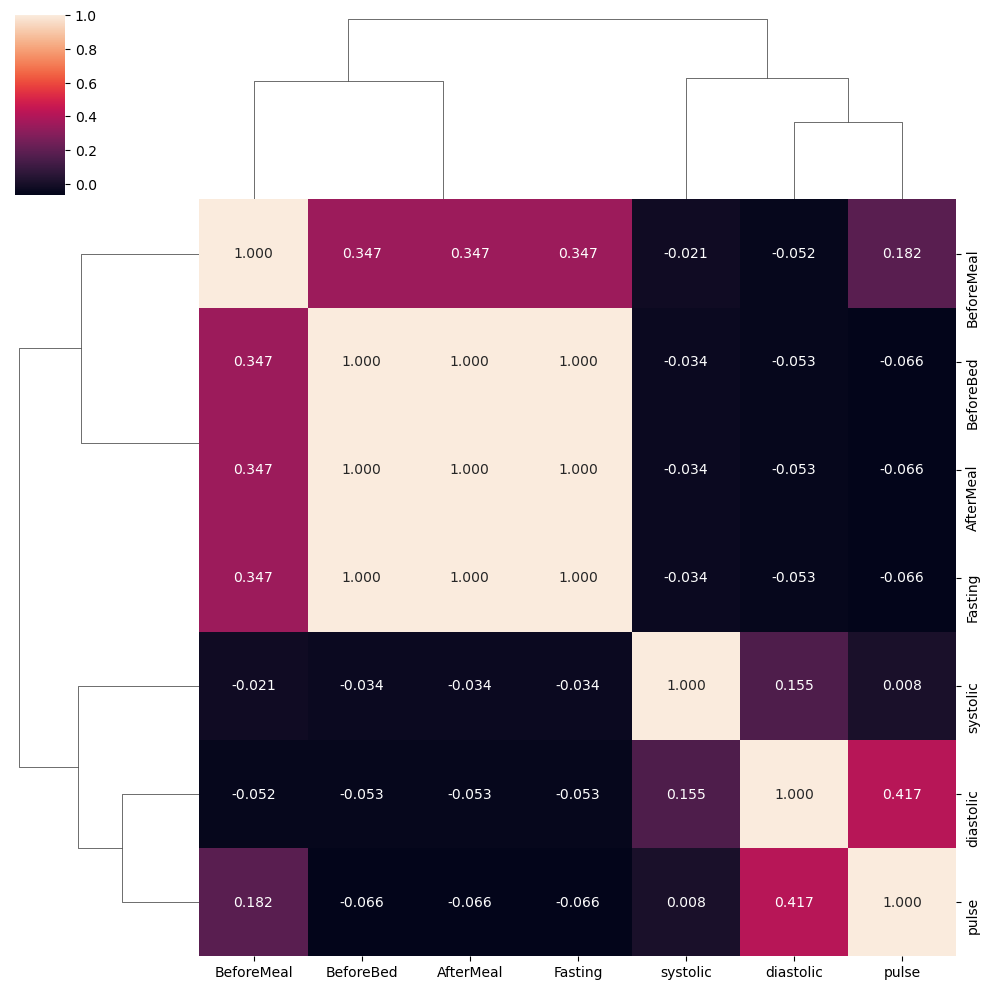

In [155]:
correlation = model_data[['systolic', 'diastolic', 'pulse', 'BeforeMeal', 'AfterMeal', 'Fasting','BeforeBed']]
sbn.clustermap(correlation.corr(), annot = True, fmt = ".3f")


there is not obvious correlation between glucoselevel of each status with systolic , diastolic and pulse

In [156]:
#target option 1 (treatment methods)
patient_illness.drop(['patientID', 'disease'],axis = 1).columns

Index(['dietControl', 'oralAntidiabetics', 'insulin', 'basalBolusInsulin',
       'preMixedInsulinBD', 'preMixedInsulinTDS', 'notControlledTreatment',
       'wellControlled'],
      dtype='object')

In [157]:
#target option 2 (disease categories)
model_data['disease'].unique()

array([2., 3., 1., 0.])

# Option1 (treatment methods)

In [158]:
import matplotlib.pyplot as plt

def comparision_by_target_num(regression):
    mean_squared_errors_train = []
    mean_squared_error_test = []
    r2_score_train = []
    r2_score_test = []
    treatments = [
           'insulin', 'basalBolusInsulin',
       'preMixedInsulinBD', 'preMixedInsulinTDS']
    for i in range(5)[1:]:

        treatment = treatments[:i]

        X = model_data.drop(
               treatment,axis=1)
        y = model_data[treatment]

        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

       # slr = LinearRegression()

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        print(f'with {i} target :')
        print('MSE train: {:.3f}, test: {:.3f}'.format(
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
        mean_squared_errors_train.append(mean_squared_error(y_train, y_train_pred))
        mean_squared_error_test.append(mean_squared_error(y_test, y_test_pred))
        print('R^2 train: {:.3f}, test: {:.3f}'.format(
                r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))
        r2_score_train.append(r2_score(y_train, y_train_pred))
        r2_score_test.append(r2_score(y_test, y_test_pred))
    y = list(range(1,1+len(mean_squared_errors_train)))
    plt.plot(y,mean_squared_errors_train,label='mean_squared_errors_train')
    plt.plot(y,mean_squared_error_test,label='mean_squared_error_test')
    plt.plot(y,r2_score_train,label='r2_score_train')
    plt.plot(y,r2_score_test,label='r2_score_test')
    plt.legend()
    plt.show()

# Linear Regression

with 1 target :
MSE train: 0.000, test: 0.037
R^2 train: 1.000, test: 0.460
with 2 target :
MSE train: 0.028, test: 0.093
R^2 train: 0.657, test: -1.054
with 3 target :
MSE train: 0.027, test: 0.070
R^2 train: 0.582, test: -0.651
with 4 target :
MSE train: 0.027, test: 0.059
R^2 train: 0.514, test: -0.479


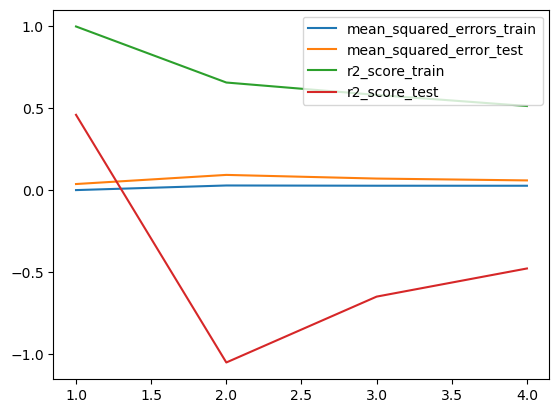

In [159]:
slr = LinearRegression()
comparision_by_target_num(slr)

# Ridge Regression

with 1 target :
MSE train: 0.033, test: 0.045
R^2 train: 0.738, test: 0.339
with 2 target :
MSE train: 0.043, test: 0.056
R^2 train: 0.482, test: -0.185
with 3 target :
MSE train: 0.036, test: 0.041
R^2 train: 0.439, test: -0.123
with 4 target :
MSE train: 0.033, test: 0.033
R^2 train: 0.409, test: -0.092


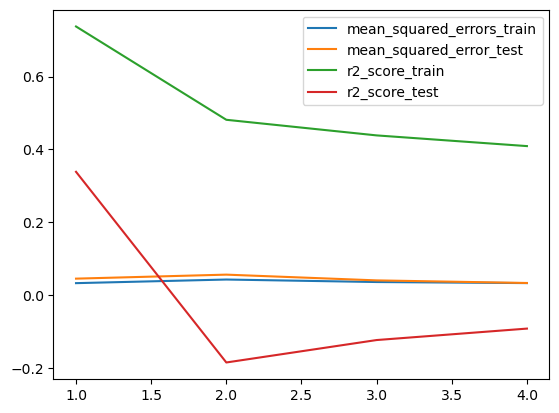

In [160]:
rid = Ridge(alpha=2.0)
comparision_by_target_num(rid)

# Lasso Regression

with 1 target :
MSE train: 0.101, test: 0.070
R^2 train: 0.195, test: -0.027
with 2 target :
MSE train: 0.081, test: 0.054
R^2 train: 0.107, test: -0.032
with 3 target :
MSE train: 0.064, test: 0.037
R^2 train: 0.097, test: -0.021
with 4 target :
MSE train: 0.054, test: 0.028
R^2 train: 0.111, test: -0.016


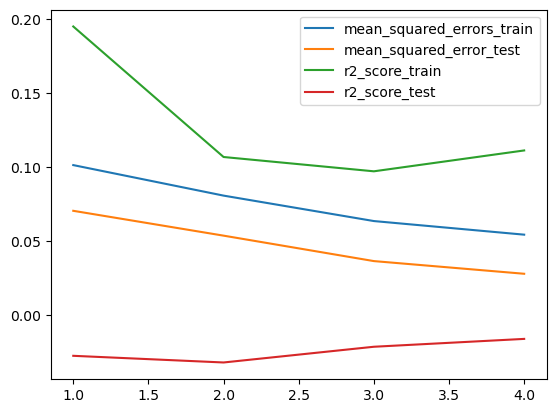

In [161]:
ls = linear_model.Lasso(alpha=0.1)
comparision_by_target_num(ls)

# Decision Tree

with 1 target :
MSE train: 0.000, test: 0.148
R^2 train: 1.000, test: -1.160
with 2 target :
MSE train: 0.000, test: 0.148
R^2 train: 1.000, test: -2.157
with 3 target :
MSE train: 0.000, test: 0.086
R^2 train: 1.000, test: -0.758
with 4 target :
MSE train: 0.000, test: 0.065
R^2 train: 1.000, test: -0.319


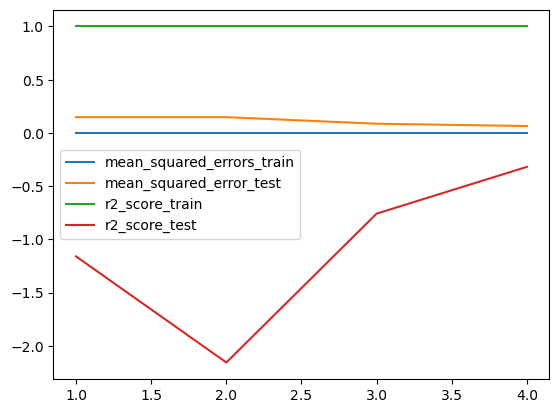

In [162]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
comparision_by_target_num(decisionTree)

In [163]:
#treatments = ['insulin', 'basalBolusInsulin',
#       'preMixedInsulinBD', 'preMixedInsulinTDS']
treatments = ['insulin']

X = model_data.drop(
       treatments,axis=1)
y = model_data[treatments]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

In [164]:
from sklearn.datasets import make_regression
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

# define base model
model = DecisionTreeRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, yhat_train),
        mean_squared_error(y_test, yhat_test)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, yhat_train),
        r2_score(y_test, yhat_test)))
# summarize the prediction
df = pd.DataFrame(yhat_test,columns=treatments)

MSE train: 0.000, test: 0.111
R^2 train: 1.000, test: -0.620


# Option 2

# Linear Regression

In [165]:
def prediction_disease(regression):
    
    X = model_data.drop([
   'disease'],axis=1)
    y = model_data[[
           'disease'      
           ]]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)

   # slr = LinearRegression()

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)
    print('MSE train: {:.3f}, test: {:.3f}'.format(
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: {:.3f}, test: {:.3f}'.format(
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    print()
#    print("below is comparision")
#    for j,i in zip(y_test['disease'].tolist(),y_test_pred.reshape(-1)):
#        print(j,i)
    

In [166]:
slr = LinearRegression()
prediction_disease(slr)

MSE train: 0.000, test: 0.037
R^2 train: 1.000, test: 0.944



# Ridge Regression

In [167]:
rid = Ridge(alpha=2.0)
prediction_disease(rid)

MSE train: 0.084, test: 0.290
R^2 train: 0.823, test: 0.565



# Lasso Regrssion

In [168]:
ls = linear_model.Lasso(alpha=0.1)
prediction_disease(ls)

MSE train: 0.326, test: 0.565
R^2 train: 0.309, test: 0.152



Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.672e+00, tolerance: 2.875e-03


# Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()
# fit model
prediction_disease(DecisionTree)

MSE train: 0.000, test: 0.556
R^2 train: 1.000, test: 0.167



# Random Forest

In [170]:
RandomForest = RandomForestRegressor()
prediction_disease(RandomForest)

MSE train: 0.027, test: 0.271
R^2 train: 0.942, test: 0.594



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# SHAP
Random Forest

In [171]:
!pip install xgboost


In [172]:
y_train.columns

Index(['insulin'], dtype='object')

In [173]:
treatments = ['insulin', 'basalBolusInsulin', ]
X = model_data.drop(
       treatments,axis=1)
y = model_data[treatments]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)



In [174]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
predict = model.predict(X_test)
print(score)

0.8518518518518519


In [175]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


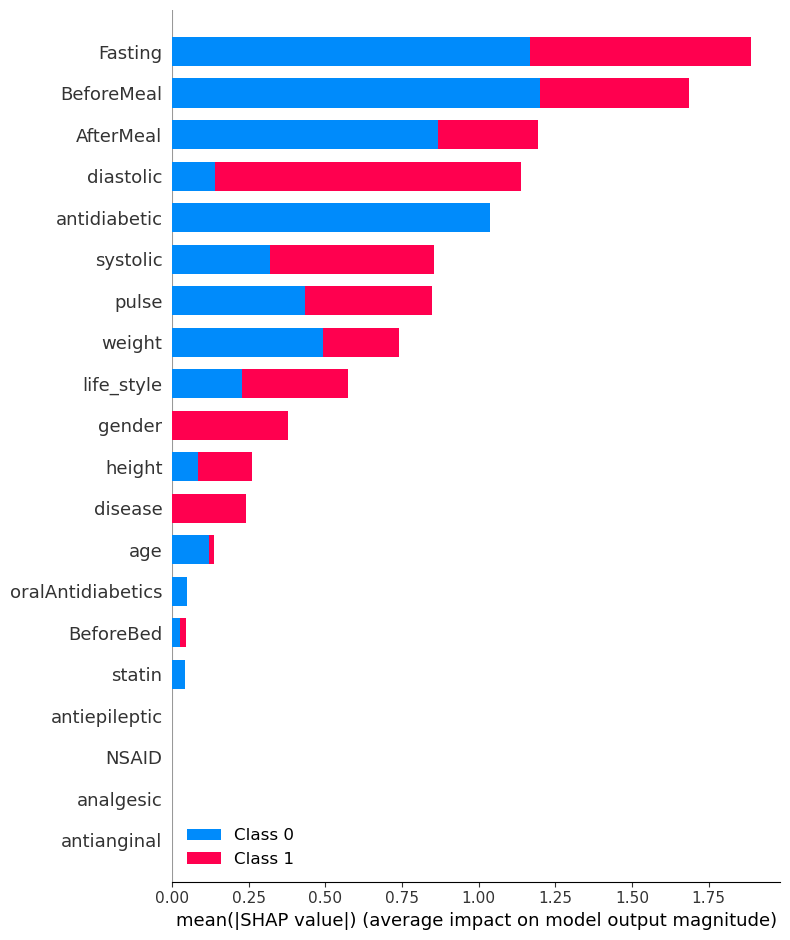

In [176]:
#this shows the importance of variable from high to low 
#color menas the influence of shap value to each categorization
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [177]:
#it shows aggregated force_plot which interpret the biggest influence of variable 
#red is positive , bluw is negative
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [178]:
model_for_pill_to_take = ['Fasting','BeforeMeal','AfterMeal','diastolic','antidiabetic','systolic','pulse']
all_treatment = ['dietControl', 'oralAntidiabetics', 'insulin',
       'basalBolusInsulin', 'preMixedInsulinBD', 'preMixedInsulinTDS',
       'notControlledTreatment', 'wellControlled']
def specific_columns_target_model(x,y,regression):
    X = model_data[x]
    y = model_data[y]

    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

    # slr = LinearRegression()

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)
    print('MSE train: {:.3f}, test: {:.3f}'.format(
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

    print('R^2 train: {:.3f}, test: {:.3f}'.format(
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
print('regression used : linear regression')
for treatment in all_treatment:
    print(f'{treatment}')
    specific_columns_target_model(model_for_pill_to_take,treatment,slr)

regression used : linear regression
dietControl
MSE train: 0.029, test: 0.042
R^2 train: 0.084, test: -0.171
oralAntidiabetics
MSE train: 0.166, test: 0.297
R^2 train: 0.174, test: -0.274
insulin
MSE train: 0.082, test: 0.078
R^2 train: 0.351, test: -0.144
basalBolusInsulin
MSE train: 0.056, test: 0.035
R^2 train: 0.092, test: 0.024
preMixedInsulinBD
MSE train: 0.029, test: 0.004
R^2 train: 0.097, test: 0.000
preMixedInsulinTDS
MSE train: 0.024, test: 0.006
R^2 train: 0.228, test: 0.000
notControlledTreatment
MSE train: 0.101, test: 0.163
R^2 train: 0.201, test: -0.081
wellControlled
MSE train: 0.054, test: 0.118
R^2 train: 0.118, test: -0.190


In [179]:
treatment = ['disease']
X = model_data.drop(
       treatment,axis=1)
y = model_data[treatment]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=2)



In [180]:

model = XGBClassifier(random_state=45)

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
predict = model.predict(X_test)
print(score)

0.8518518518518519


In [181]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


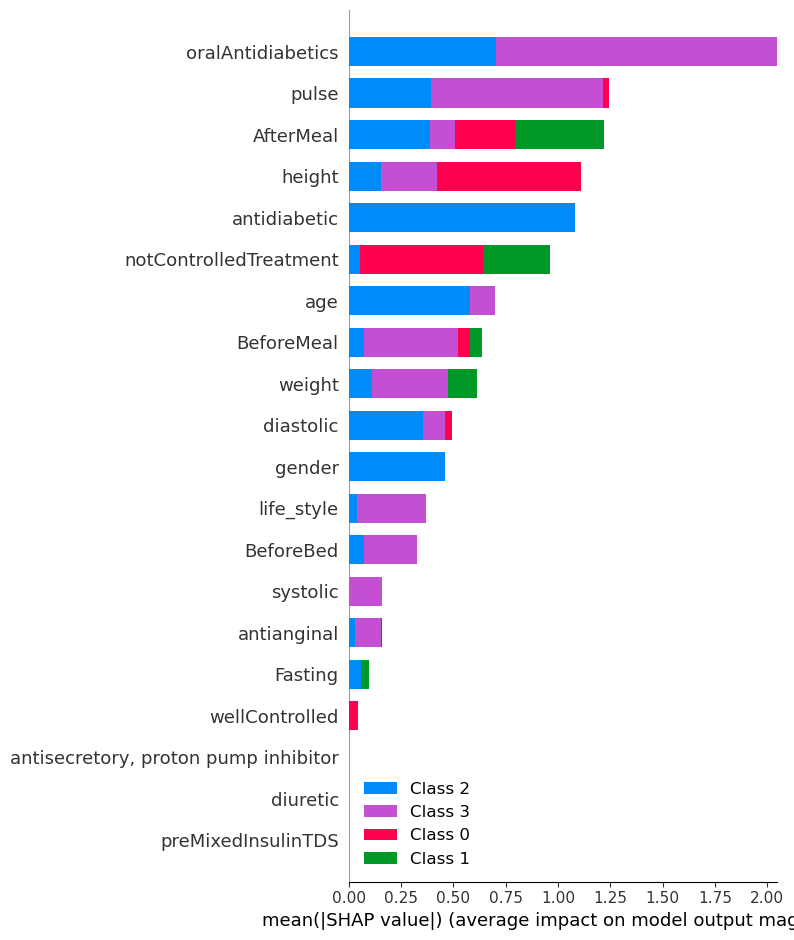

In [182]:
#this shows the importance of variable from high to low 
#color menas the influence of shap value to each categorization
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [183]:
#it shows aggregated force_plot which interpret the biggest influence of variable 
#red is positive , bluw is negative
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

0.8518518518518519


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


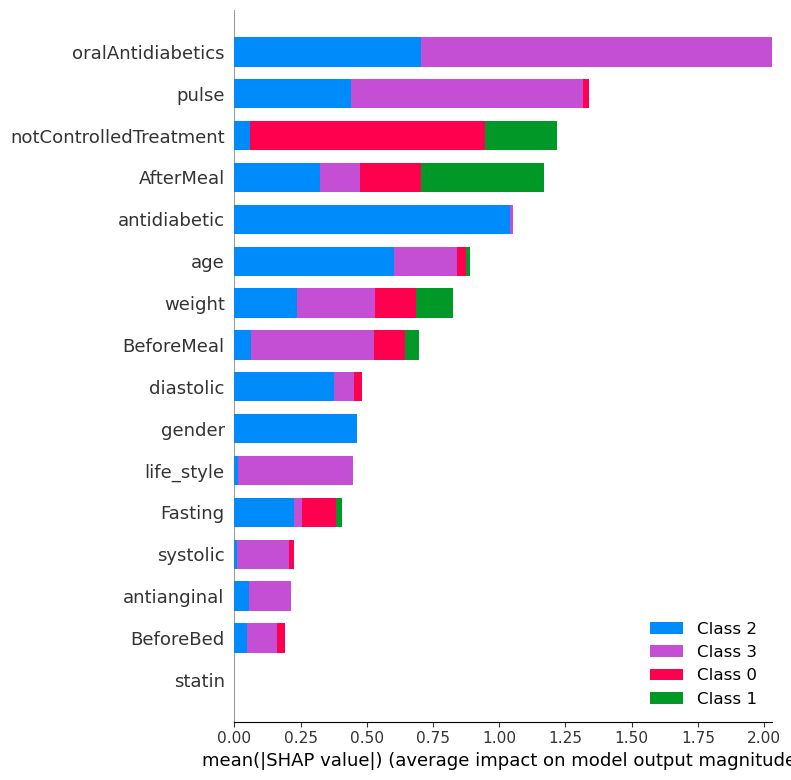

In [184]:
model_for_disease_detection = ['oralAntidiabetics','antidiabetic','pulse','notControlledTreatment',\
                               'BeforeMeal','life_style','weight','systolic','Fasting','age','diastolic','AfterMeal'\
                              ,'statin','antianginal','BeforeBed','gender']
X = model_data[model_for_disease_detection]
y = model_data['disease']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=2)

model = XGBClassifier(random_state=45)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
predict = model.predict(X_test)
print(score)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [185]:
regression_model = [slr,rid,ls,DecisionTree,RandomForest]

In [186]:
for model in regression_model:
    print(f'{model} :')
    specific_columns_target_model(model_for_disease_detection,'disease',model)

LinearRegression() :
MSE train: 0.145, test: 0.423
R^2 train: 0.692, test: 0.365
Ridge(alpha=2.0) :
MSE train: 0.151, test: 0.442
R^2 train: 0.679, test: 0.338
Lasso(alpha=0.1) :
MSE train: 0.326, test: 0.565
R^2 train: 0.309, test: 0.152
DecisionTreeRegressor() :
MSE train: 0.000, test: 0.593
R^2 train: 1.000, test: 0.111
RandomForestRegressor() :
MSE train: 0.027, test: 0.322
R^2 train: 0.943, test: 0.517


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.672e+00, tolerance: 2.875e-03


# Conclusion

from result of shap , we found most correlated column datas to each model. 

In option1

From result it is hard to predict what pill types to take , even using most correlated column datas

In option2

it shows best result with original data with linear regression . For pursing better result , models with most correlated column datas are used , however result did not go better